<a href="https://colab.research.google.com/github/wonjae124/Capston/blob/colab/220523_classifier_dog_cat_capston_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHELTER ANIMAL OUTCOMES 
by Ebru Yaren Çatak

---



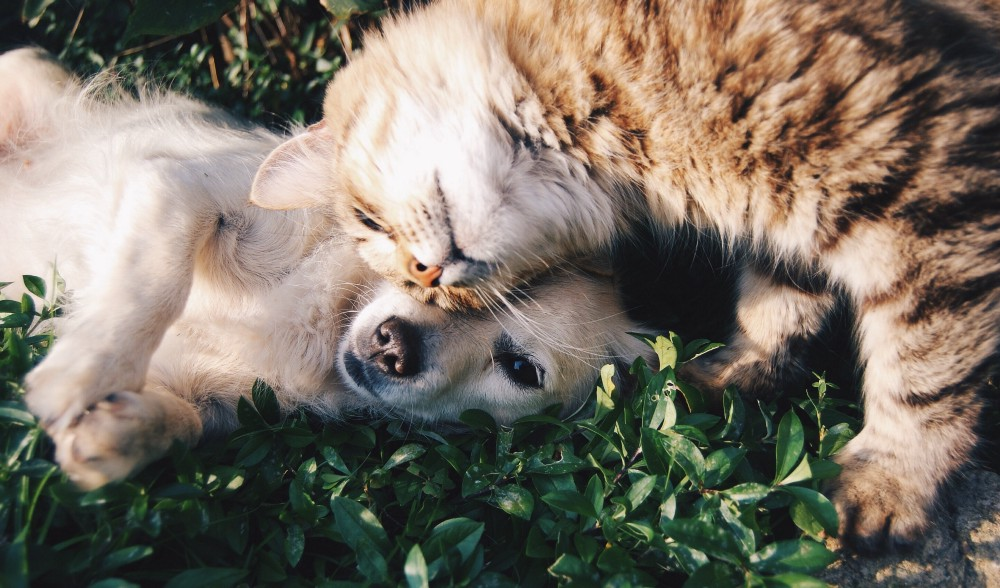

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-plot

In [3]:
import torch

import numpy as np # linear algebra
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import scikitplot as skplt

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Train

In [4]:
train_at = pd.read_csv("/content/drive/My Drive/train.csv.gz")
train_at.columns = map(str.lower, train_at.columns)
train_at.rename(columns={'sexuponoutcome':'sex'},inplace=True)

In [5]:
train_at.name.unique().size

6375

In [6]:
train_at.outcometype.value_counts

<bound method IndexOpsMixin.value_counts of 0        Return_to_owner
1             Euthanasia
2               Adoption
3               Transfer
4               Transfer
              ...       
26724           Transfer
26725           Transfer
26726           Adoption
26727           Transfer
26728           Transfer
Name: outcometype, Length: 26729, dtype: object>

## Test

In [7]:
test_at = pd.read_csv("/content/drive/My Drive/test.csv.gz")
test_at.columns = map(str.lower, test_at.columns)
test_at.rename(columns={'sexuponoutcome':'sex'},inplace=True)

In [8]:
test_at = test_at.drop(['datetime'], axis=1)

test_at.shape

(11456, 7)

In [9]:
test_at.head()

,id,name,animaltype,sex,ageuponoutcome,breed,color
0,1,Summer,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [10]:
train_at.apply(lambda x: sum(x.isnull()/len(train_at)))

animalid          0.000000
name              0.287740
datetime          0.000000
outcometype       0.000000
outcomesubtype    0.509260
animaltype        0.000000
sex               0.000037
ageuponoutcome    0.000673
breed             0.000000
color             0.000000
dtype: float64

# Petfinder

In [11]:
# import two datasets
breed = pd.read_csv('/content/drive/MyDrive/pet/breed_labels.csv')
color = pd.read_csv('/content/drive/MyDrive/pet/color_labels.csv')
train_pf = pd.read_csv('/content/drive/MyDrive/pet/train.csv')
train_pf['DataType'] = 'train'
test_pf = pd.read_csv('/content/drive/MyDrive/pet/test.csv')
test_pf['DataType'] = 'test'
# the combine dataset for visualization purpose
df = pd.concat([train_pf,test_pf], sort=True)

###Color

In [12]:
# Change the Color to Strings based on color_labels

# train:
train_pf[['Color1','Color2','Color3']] = train_pf[['Color1','Color2','Color3']].replace([1,2,3,4,5,6,7],
                            ['Black','Brown','Golden','Yellow','Cream','Gray','White'])
train_pf[['Color1','Color2','Color3']] = train_pf[['Color1','Color2','Color3']].replace(0,'none')

# test:
test_pf[['Color1','Color2','Color3']] = train_pf[['Color1','Color2','Color3']].replace([1,2,3,4,5,6,7],
                            ['Black','Brown','Golden','Yellow','Cream','Gray','White'])
test_pf[['Color1','Color2','Color3']] = test_pf[['Color1','Color2','Color3']].replace(0,'none')

# df:
df[['Color1','Color2','Color3']] = df[['Color1','Color2','Color3']].replace([1,2,3,4,5,6,7],
                            ['Black','Brown','Golden','Yellow','Cream','Gray','White'])
df[['Color1','Color2','Color3']] = df[['Color1','Color2','Color3']].replace(0,'none')

## Breed

In [13]:
# Change the top 5 dog/cat breeds to names

# train:
train_pf[['Breed1','Breed2']] = train_pf[['Breed1','Breed2']].replace([307,179,205,109,20,285,141,218,254,103,243,213,189,283,247,195,152,128,78,306,303,69,76,119],
                                                         ['Mixed breeds','Poodle','Shih Tzu',
                                                          'Golden Retriever','Beagle',
                                                          'Persian','Labrador Retriever',
                                                          'Terrier','Calico','German Shepherd Dog',
                                                          'American Shorthair','Spitz','Rottweiler',
                                                          'Oriental Short Hair','Bengal',
                                                          'Schnauzer','Miniature Pinscher',
                                                          'Jack Russell Terrier','Doberman Pinscher',
                                                          'Tuxedo','Tortoiseshell','Cocker Spaniel',
                                                          'Dalmatian','Husky'])


train_pf[['Breed1','Breed2']] = train_pf[['Breed1','Breed2']].replace([266,265,264,299,292],
                                                         ['Domestic short hair','Domestic medium hair',
                                                          'Domestic long hair','Tabby','Siamese'])

# test:
test_pf[['Breed1','Breed2']] = test_pf[['Breed1','Breed2']].replace([307,179,205,109,20,285,141,218,254,103,243,213,189,283,247,195,152,128,78,306,303,69,76,119],
                                                         ['Mixed breeds','Poodle','Shih Tzu',
                                                          'Golden Retriever','Beagle',
                                                          'Persian','Labrador Retriever',
                                                          'Terrier','Calico','German Shepherd Dog',
                                                          'American Shorthair','Spitz','Rottweiler',
                                                          'Oriental Short Hair','Bengal',
                                                          'Schnauzer','Miniature Pinscher',
                                                          'Jack Russell Terrier','Doberman Pinscher',
                                                          'Tuxedo','Tortoiseshell','Cocker Spaniel',
                                                          'Dalmatian','Husky'])

test_pf[['Breed1','Breed2']] = test_pf[['Breed1','Breed2']].replace([266,265,264,299,292],
                                                         ['Domestic short hair','Domestic medium hair',
                                                          'Domestic long hair','Tabby','Siamese'])

# df:
df[['Breed1','Breed2']] = df[['Breed1','Breed2']].replace([307,179,205,109,20,285,141,218,254,103,243,213,189,283,247,195,152,128,78,306,303,69,76,119],
                                                         ['Mixed breeds','Poodle','Shih Tzu',
                                                          'Golden Retriever','Beagle',
                                                          'Persian','Labrador Retriever',
                                                          'Terrier','Calico','German Shepherd Dog',
                                                          'American Shorthair','Spitz','Rottweiler',
                                                          'Oriental Short Hair','Bengal',
                                                          'Schnauzer','Miniature Pinscher',
                                                          'Jack Russell Terrier','Doberman Pinscher',
                                                          'Tuxedo','Tortoiseshell','Cocker Spaniel',
                                                          'Dalmatian','Husky'])

df[['Breed1','Breed2']] = df[['Breed1','Breed2']].replace([266,265,264,299,292],
                                                         ['Domestic short hair','Domestic medium hair',
                                                          'Domestic long hair','Tabby','Siamese'])



## rename/make new columns

In [14]:
train_pf.rename(columns ={'Breed1':'breed',
                         'Type'  :'animaltype'},inplace=True)

test_pf.rename(columns ={'Breed1':'breed',
                         'Type'  :'animaltype'},inplace=True)

train_pf['outcometype']='Adoption'
test_pf['outcometype']='Adoption'


In [15]:
train_pf.columns

Index(['animaltype', 'Name', 'Age', 'breed', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'DataType', 'outcometype'],
      dtype='object')

In [16]:
train_at.columns

Index(['animalid', 'name', 'datetime', 'outcometype', 'outcomesubtype',
       'animaltype', 'sex', 'ageuponoutcome', 'breed', 'color'],
      dtype='object')

In [17]:
train_at.columns

Index(['animalid', 'name', 'datetime', 'outcometype', 'outcomesubtype',
       'animaltype', 'sex', 'ageuponoutcome', 'breed', 'color'],
      dtype='object')

In [18]:
# Change the Maturity Size as the following: 
#1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Sure

# train_pf:
train_pf[['MaturitySize']] = train_pf[['MaturitySize']].replace([0,1,2,3,4],
                            ['Not Sure','Small','Medium','Large','Extra Large'])

#test_pf:
test_pf[['MaturitySize']] = test_pf[['MaturitySize']].replace([0,1,2,3,4],
                            ['Not Sure','Small','Medium','Large','Extra Large'])

#df:
df[['MaturitySize']] = df[['MaturitySize']].replace([0,1,2,3,4],
                            ['Not Sure','Small','Medium','Large','Extra Large'])

In [19]:
# Change the Fur Length as the following: 
# 1 = Short, 2 = Medium, 3 = Long, 0 = Not Sure

# train_pf:
train_pf[['FurLength']] = train_pf[['FurLength']].replace([0,1,2,3],['Not Sure','Short','Medium','Long'])

# test_pf:
test_pf[['FurLength']] = test_pf[['FurLength']].replace([0,1,2,3],['Not Sure','Short','Medium','Long'])

# df:
df[['FurLength']] = df[['FurLength']].replace([0,1,2,3],['Not Sure','Short','Medium','Long'])

In [20]:
# Change the vacinated, Dewormed, Sterilized as the following:
#vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
#Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
#Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

# train_pf:
train_pf[['Vaccinated']] = train_pf[['Vaccinated']].replace([1,2,3],['Yes','No','Not Sure'])
train_pf[['Dewormed']] = train_pf[['Dewormed']].replace([1,2,3],['Yes','No','Not Sure'])
train_pf[['Sterilized']] = train_pf[['Sterilized']].replace([1,2,3],['Yes','No','Not Sure'])

# test_pf:
test_pf[['Vaccinated']] = test_pf[['Vaccinated']].replace([1,2,3],['Yes','No','Not Sure'])
test_pf[['Dewormed']] = test_pf[['Dewormed']].replace([1,2,3],['Yes','No','Not Sure'])
test_pf[['Sterilized']] = test_pf[['Sterilized']].replace([1,2,3],['Yes','No','Not Sure'])

# df:
df[['Vaccinated']] = df[['Vaccinated']].replace([1,2,3],['Yes','No','Not Sure'])
df[['Dewormed']] = df[['Dewormed']].replace([1,2,3],['Yes','No','Not Sure'])
df[['Sterilized']] = df[['Sterilized']].replace([1,2,3],['Yes','No','Not Sure'])

In [21]:
# Change the health as the following:
#1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Sure

# train_pf:
train_pf[['Health']] = train_pf[['Health']].replace([0,1,2,3],['Not Sure','Healthy','Minor Injury','Serious Injury'])

# test_pf:
test_pf[['Health']] = test_pf[['Health']].replace([0,1,2,3],['Not Sure','Healthy','Minor Injury','Serious Injury'])

# df:
df[['Health']] = df[['Health']].replace([0,1,2,3],['Not Sure','Healthy','Minor Injury','Serious Injury'])

In [22]:
# Change the DataType: 1 = Dog, 2 = Cat

# train_pf:
train_pf[['animaltype']] = train_pf[['animaltype']].replace([1,2],['Dog','Cat'])

# test_pf:
test_pf[['animaltype']] = test_pf[['animaltype']].replace([1,2],['Dog','Cat'])


In [23]:
train_pf.head()

,animaltype,Name,Age,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,DataType,outcometype
0,Cat,Nibble,3,Tabby,0,1,Black,White,none,Small,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,train,Adoption
1,Cat,No Name Yet,1,Domestic medium hair,0,1,Black,Brown,none,Medium,...,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,train,Adoption
2,Dog,Brisco,1,Mixed breeds,0,1,Brown,White,none,Medium,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,train,Adoption
3,Dog,Miko,4,Mixed breeds,0,2,Black,Brown,none,Medium,...,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,train,Adoption
4,Dog,Hunter,1,Mixed breeds,0,1,Black,none,none,Medium,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,train,Adoption


In [24]:
# Change the Gender: 1 = Male, 2 = Female, 3 = Neutered/Sprayed

# train_pf:
train_pf[['sex']] = train_pf[['Gender']].replace([1,2,3],['Male','Female','Neutered/Spayed'])

# test_pf:
test_pf[['sex']] = test_pf[['Gender']].replace([1,2,3],['Male','Female','Neutered/Spayed'])



In [25]:
# clean name column: 
# no name yet -> No name;
# Nan -> No name;
# No Name -> No name;

# train_pf:
train_pf['Name'] = train_pf['Name'].replace(['No Name Yet', '0'],['No name','0']) #No Name에 관해서도 처리 필요하다.
train_pf['Name'] = train_pf['Name'].fillna('0')

# test_pf:
test_pf['Name'] = test_pf['Name'].replace(['No Name Yet', '0'],['No name','0'])
test_pf['Name'] = test_pf['Name'].fillna('0')

# df:
test_pf['Name'] = test_pf['Name'].replace(['No Name Yet', '0'],['No name','0'])
df['Name'] = df['Name'].fillna('0')

In [26]:
train_pf['Name'].value_counts()

0                         1257
Baby                        66
Lucky                       64
No Name                     54
Brownie                     54
                          ... 
Fuzzy                        1
Maroo                        1
4 PUPPIES FOR ADOPTION       1
Trish                        1
Fili                         1
Name: Name, Length: 9061, dtype: int64

In [27]:
# Drop unuseful columns and drop the AdoptionSpeed = null rows

#train_pf: 
train_pf_null = np.array(train_pf[train_pf['AdoptionSpeed'].isnull() == True].index)
train_pf = train_pf.drop(train_pf_null)
train_pf = train_pf.drop(['PhotoAmt','RescuerID','State','VideoAmt'], axis = 1)

#test_pf:
test_pf = test_pf.drop(['PhotoAmt','RescuerID','State','VideoAmt'], axis = 1)

# df:
df_nan = np.array(train_pf[train_pf['AdoptionSpeed'].isnull() == True].index)
df = df.drop(df_nan)
df = df.drop(['PhotoAmt','RescuerID','State','VideoAmt'], axis = 1)

In [28]:
# save cleaned dataset as csv files:

#train_pf:
train_pf.to_csv('cleaned-train_pf.csv')

#test_pf:
test_pf.to_csv('cleaned-test_pf.csv')

#df:
df.to_csv('cleaned-data.csv')

In [29]:
train_pf.head(5)

,animaltype,Name,Age,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,Description,PetID,AdoptionSpeed,DataType,outcometype,sex
0,Cat,Nibble,3,Tabby,0,1,Black,White,none,Small,...,No,Healthy,1,100,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2,train,Adoption,Male
1,Cat,No name,1,Domestic medium hair,0,1,Black,Brown,none,Medium,...,Not Sure,Healthy,1,0,I just found it alone yesterday near my apartm...,6296e909a,0,train,Adoption,Male
2,Dog,Brisco,1,Mixed breeds,0,1,Brown,White,none,Medium,...,No,Healthy,1,0,Their pregnant mother was dumped by her irresp...,3422e4906,3,train,Adoption,Male
3,Dog,Miko,4,Mixed breeds,0,2,Black,Brown,none,Medium,...,No,Healthy,1,150,"Good guard dog, very alert, active, obedience ...",5842f1ff5,2,train,Adoption,Female
4,Dog,Hunter,1,Mixed breeds,0,1,Black,none,none,Medium,...,No,Healthy,1,0,This handsome yet cute boy is up for adoption....,850a43f90,2,train,Adoption,Male


In [30]:
train_pf.describe()

,Age,Gender,Quantity,Fee,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.776162,1.576069,21.259988,2.516441
std,18.155790,0.681592,1.472477,78.414548,1.177265
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,2.000000
50%,3.000000,2.000000,1.000000,0.000000,2.000000
75%,12.000000,2.000000,1.000000,0.000000,4.000000
max,255.000000,3.000000,20.000000,3000.000000,4.000000


In [31]:
train_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animaltype     14993 non-null  object
 1   Name           14993 non-null  object
 2   Age            14993 non-null  int64 
 3   breed          14993 non-null  object
 4   Breed2         14993 non-null  object
 5   Gender         14993 non-null  int64 
 6   Color1         14993 non-null  object
 7   Color2         14993 non-null  object
 8   Color3         14993 non-null  object
 9   MaturitySize   14993 non-null  object
 10  FurLength      14993 non-null  object
 11  Vaccinated     14993 non-null  object
 12  Dewormed       14993 non-null  object
 13  Sterilized     14993 non-null  object
 14  Health         14993 non-null  object
 15  Quantity       14993 non-null  int64 
 16  Fee            14993 non-null  int64 
 17  Description    14981 non-null  object
 18  PetID          14993 non-n

In [32]:
def hasName(dataFrame):
  dataFrame["Name"] = dataFrame["Name"].fillna(0)
  dataFrame['hasName'] = dataFrame.Name.apply(lambda x: 0 if x == 0 else 1)
  return dataFrame

In [33]:
train_pf= hasName(train_pf)


In [34]:
train_pf

,animaltype,Name,Age,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,Description,PetID,AdoptionSpeed,DataType,outcometype,sex,hasName
0,Cat,Nibble,3,Tabby,0,1,Black,White,none,Small,...,Healthy,1,100,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2,train,Adoption,Male,1
1,Cat,No name,1,Domestic medium hair,0,1,Black,Brown,none,Medium,...,Healthy,1,0,I just found it alone yesterday near my apartm...,6296e909a,0,train,Adoption,Male,1
2,Dog,Brisco,1,Mixed breeds,0,1,Brown,White,none,Medium,...,Healthy,1,0,Their pregnant mother was dumped by her irresp...,3422e4906,3,train,Adoption,Male,1
3,Dog,Miko,4,Mixed breeds,0,2,Black,Brown,none,Medium,...,Healthy,1,150,"Good guard dog, very alert, active, obedience ...",5842f1ff5,2,train,Adoption,Female,1
4,Dog,Hunter,1,Mixed breeds,0,1,Black,none,none,Medium,...,Healthy,1,0,This handsome yet cute boy is up for adoption....,850a43f90,2,train,Adoption,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,0,2,Domestic short hair,0,3,Black,none,none,Medium,...,Healthy,4,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,2,train,Adoption,Neutered/Spayed,1
14989,Cat,Serato & Eddie,60,Domestic medium hair,Domestic long hair,3,Black,Yellow,White,Medium,...,Healthy,2,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,4,train,Adoption,Neutered/Spayed,1
14990,Cat,Monkies,2,Domestic medium hair,Domestic short hair,3,Cream,Gray,White,Large,...,Healthy,5,30,"Mix breed, good temperament kittens. Love huma...",d981b6395,3,train,Adoption,Neutered/Spayed,1
14991,Cat,Ms Daym,9,Domestic short hair,0,2,Yellow,White,none,Small,...,Healthy,1,0,she is very shy..adventures and independent..s...,e4da1c9e4,4,train,Adoption,Female,1


In [35]:
train_pf = train_pf.drop(["Name"],axis=1)
test_pf = test_pf.drop(["Name"],axis=1)

In [36]:
def calc_age_in_days(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x == '0': return 0
    else: return age * 30

In [37]:
train_pf['AgeInDays'] = train_pf.Age.apply(calc_age_in_days)
test_pf['AgeInDays'] = test_pf.Age.apply(calc_age_in_days)

In [38]:
train_pf['AgeInMonths']=train_pf.Age
test_pf['AgeInMonths']=test_pf.Age

In [39]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    return (int(x)//int(12))

train_pf['AgeInYears'] = train_pf.Age.apply(calc_age_in_years)
test_pf['AgeInYears'] = test_pf.Age.apply(calc_age_in_years)

In [40]:
train_pf['AgeInYears'].value_counts() # 나이대 분포

0     11244
1      1557
2       817
3       484
4       300
5       223
6       125
7       112
8        48
10       35
9        24
11        9
12        5
17        3
21        2
15        2
13        1
14        1
19        1
Name: AgeInYears, dtype: int64

In [41]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [42]:
train_pf = setPuppy(train_pf)
test_pf = setPuppy(test_pf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
train_pf = train_pf.drop(['Age'],axis=1)
test_pf = test_pf.drop(['Age'],axis=1)

In [44]:
train_pf.head()

,animaltype,breed,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,...,PetID,AdoptionSpeed,DataType,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy
0,Cat,Tabby,0,1,Black,White,none,Small,Short,No,...,86e1089a3,2,train,Adoption,Male,1,90,3,0,0
1,Cat,Domestic medium hair,0,1,Black,Brown,none,Medium,Medium,Not Sure,...,6296e909a,0,train,Adoption,Male,1,30,1,0,1
2,Dog,Mixed breeds,0,1,Brown,White,none,Medium,Medium,Yes,...,3422e4906,3,train,Adoption,Male,1,30,1,0,1
3,Dog,Mixed breeds,0,2,Black,Brown,none,Medium,Short,Yes,...,5842f1ff5,2,train,Adoption,Female,1,120,4,0,0
4,Dog,Mixed breeds,0,1,Black,none,none,Medium,Short,No,...,850a43f90,2,train,Adoption,Male,1,30,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


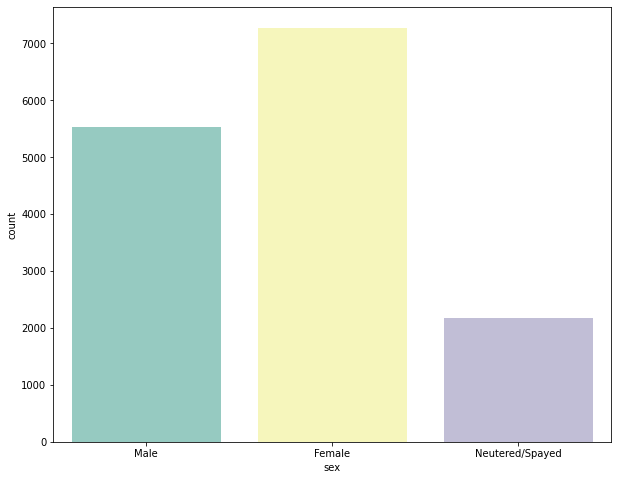

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(train_pf.sex,palette='Set3')

In [46]:
def isNeutered(dataFrame):
    dataFrame['Sterilized'] = pd.np.where(dataFrame.sex.str.contains("Neutered"), 1, 
                                          pd.np.where(dataFrame.sex.str.contains("Spayed"), 1, 0))
    return dataFrame

In [47]:
train_pf = isNeutered(train_pf)
test_pf = isNeutered(test_pf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


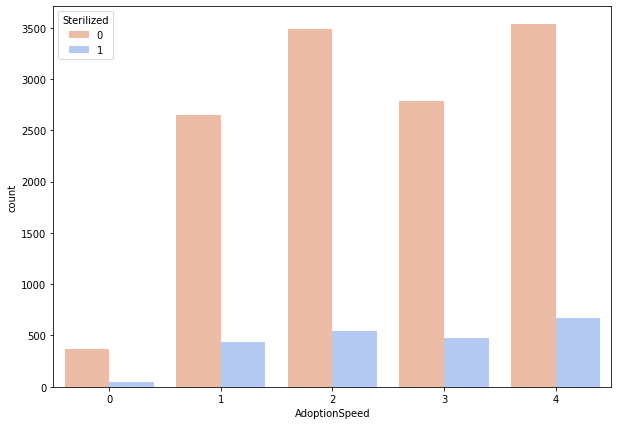

In [48]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_pf, x='AdoptionSpeed',hue='Sterilized', palette='coolwarm_r')

In [49]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sex.str.contains("Male"), "Male", "None"))
    return dataFrame

In [50]:
train_pf = setSex(train_pf)
test_pf = setSex(test_pf)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
train_pf = train_pf.drop(["Gender"],axis=1)
test_pf = test_pf.drop(["Gender"],axis=1)

In [52]:
train_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,...,PetID,AdoptionSpeed,DataType,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy
0,Cat,Tabby,0,Black,White,none,Small,Short,No,No,...,86e1089a3,2,train,Adoption,Male,1,90,3,0,0
1,Cat,Domestic medium hair,0,Black,Brown,none,Medium,Medium,Not Sure,Not Sure,...,6296e909a,0,train,Adoption,Male,1,30,1,0,1
2,Dog,Mixed breeds,0,Brown,White,none,Medium,Medium,Yes,Yes,...,3422e4906,3,train,Adoption,Male,1,30,1,0,1
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Short,Yes,Yes,...,5842f1ff5,2,train,Adoption,Female,1,120,4,0,0
4,Dog,Mixed breeds,0,Black,none,none,Medium,Short,No,No,...,850a43f90,2,train,Adoption,Male,1,30,1,0,1


In [53]:
train_pf.columns

Index(['animaltype', 'breed', 'Breed2', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'Description', 'PetID', 'AdoptionSpeed',
       'DataType', 'outcometype', 'sex', 'hasName', 'AgeInDays', 'AgeInMonths',
       'AgeInYears', 'isPuppy'],
      dtype='object')

In [54]:
test_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,...,Fee,Description,PetID,DataType,outcometype,sex,AgeInDays,AgeInMonths,AgeInYears,isPuppy
0,Cat,Domestic short hair,Domestic short hair,Black,White,none,Small,Short,Yes,Yes,...,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,test,Adoption,Male,240,8,0,0
1,Cat,Persian,Domestic long hair,Black,Brown,none,Medium,Long,Yes,Yes,...,0,"Please note that Chichi has been neutered, the...",f153b465f,test,Adoption,Female,1080,36,3,0
2,Cat,Domestic medium hair,0,Brown,White,none,Medium,Medium,Yes,Yes,...,200,"Sticky, named such because of his tendency to ...",3c90f3f54,test,Adoption,Male,60,2,0,0
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Medium,Yes,Yes,...,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,test,Adoption,Female,360,12,1,0
4,Cat,Domestic medium hair,0,Black,none,none,Medium,Medium,Yes,Yes,...,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,test,Adoption,Male,360,12,1,0


In [55]:
test_pf.columns

Index(['animaltype', 'breed', 'Breed2', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'Description', 'PetID', 'DataType',
       'outcometype', 'sex', 'AgeInDays', 'AgeInMonths', 'AgeInYears',
       'isPuppy'],
      dtype='object')

In [56]:
train_pf = train_pf.drop(["PetID","Description","DataType","Quantity","Health"],axis=1)
test_pf = test_pf.drop(["PetID","Description","DataType","Quantity","Health"],axis=1)


In [57]:
train_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,AdoptionSpeed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy
0,Cat,Tabby,0,Black,White,none,Small,Short,No,No,0,100,2,Adoption,Male,1,90,3,0,0
1,Cat,Domestic medium hair,0,Black,Brown,none,Medium,Medium,Not Sure,Not Sure,0,0,0,Adoption,Male,1,30,1,0,1
2,Dog,Mixed breeds,0,Brown,White,none,Medium,Medium,Yes,Yes,0,0,3,Adoption,Male,1,30,1,0,1
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Short,Yes,Yes,0,150,2,Adoption,Female,1,120,4,0,0
4,Dog,Mixed breeds,0,Black,none,none,Medium,Short,No,No,0,0,2,Adoption,Male,1,30,1,0,1


In [58]:
test_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,outcometype,sex,AgeInDays,AgeInMonths,AgeInYears,isPuppy
0,Cat,Domestic short hair,Domestic short hair,Black,White,none,Small,Short,Yes,Yes,0,0,Adoption,Male,240,8,0,0
1,Cat,Persian,Domestic long hair,Black,Brown,none,Medium,Long,Yes,Yes,0,0,Adoption,Female,1080,36,3,0
2,Cat,Domestic medium hair,0,Brown,White,none,Medium,Medium,Yes,Yes,0,200,Adoption,Male,60,2,0,0
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Medium,Yes,Yes,0,0,Adoption,Female,360,12,1,0
4,Cat,Domestic medium hair,0,Black,none,none,Medium,Medium,Yes,Yes,0,0,Adoption,Male,360,12,1,0


In [59]:
train_pf.head()

,animaltype,breed,Breed2,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,AdoptionSpeed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy
0,Cat,Tabby,0,Black,White,none,Small,Short,No,No,0,100,2,Adoption,Male,1,90,3,0,0
1,Cat,Domestic medium hair,0,Black,Brown,none,Medium,Medium,Not Sure,Not Sure,0,0,0,Adoption,Male,1,30,1,0,1
2,Dog,Mixed breeds,0,Brown,White,none,Medium,Medium,Yes,Yes,0,0,3,Adoption,Male,1,30,1,0,1
3,Dog,Mixed breeds,0,Black,Brown,none,Medium,Short,Yes,Yes,0,150,2,Adoption,Female,1,120,4,0,0
4,Dog,Mixed breeds,0,Black,none,none,Medium,Short,No,No,0,0,2,Adoption,Male,1,30,1,0,1


In [60]:
color_counts = train_pf['Color1'].value_counts()
color_counts.head(20)

Black     7427
Brown     3750
Golden     947
Cream      884
Gray       684
White      667
Yellow     634
Name: Color1, dtype: int64

In [61]:
color_counts = train_pf['Color2'].value_counts()
color_counts.head(20)

none      4471
White     3438
Brown     3313
Cream     1128
Gray      1063
Yellow     870
Golden     710
Name: Color2, dtype: int64

In [62]:
color_counts = train_pf['Color3'].value_counts()
color_counts.head(20)

none      10604
White      3221
Cream       417
Gray        378
Yellow      198
Golden      175
Name: Color3, dtype: int64

In [63]:
train_pf['color']=train_pf['Color1']+str('/')+train_pf['Color2']
test_pf['color']=test_pf['Color1']+str('/')+test_pf['Color2']

In [64]:
train_pf['color']

0         Black/White
1         Black/Brown
2         Brown/White
3         Black/Brown
4          Black/none
             ...     
14988      Black/none
14989    Black/Yellow
14990      Cream/Gray
14991    Yellow/White
14992      Brown/none
Name: color, Length: 14993, dtype: object

In [65]:
train_pf['isMultiColor'] = train_pf['color'].apply(lambda x:0 if 'none' in x else 1)
test_pf['isMultiColor'] = test_pf['color'].apply(lambda x:0 if 'none' in x else 1)


In [66]:
train_pf.isMultiColor.value_counts()

1    10522
0     4471
Name: isMultiColor, dtype: int64

In [67]:
train_pf = train_pf.drop(["Color1","Color2","Color3"],axis=1)
test_pf = test_pf.drop(["Color1","Color2","Color3"],axis=1)

# Data Cleaning and Feature Selection

## Cats and dogs Data Cleaning

In [68]:
train_at = train_at.drop(['animalid'], axis=1)

In [69]:
np.sum(train_at.isnull())

name               7691
datetime              0
outcometype           0
outcomesubtype    13612
animaltype            0
sex                   1
ageuponoutcome       18
breed                 0
color                 0
dtype: int64

In [70]:
train_at.dropna(subset=['ageuponoutcome'], inplace=True)

In [71]:
train_at.dropna(subset=['sex'], inplace=True)

In [72]:
train_at = train_at.drop(['outcomesubtype'], axis=1)
train_at = train_at.drop(['datetime'], axis=1)

### NAME

In [73]:
def hasName(dataFrame):
  dataFrame["name"] = dataFrame["name"].fillna(0)
  dataFrame['hasName'] = dataFrame.name.apply(lambda x: 0 if x == 0 else 1)
  return dataFrame

In [74]:
train_at = hasName(train_at)
train_at = train_at.drop(['name'], axis=1)


In [75]:
test_at.head()

,id,name,animaltype,sex,ageuponoutcome,breed,color
0,1,Summer,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


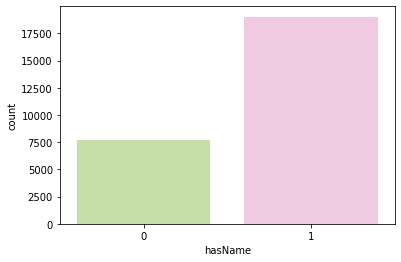

In [76]:
sns.countplot(train_at.hasName, palette='PiYG_r')

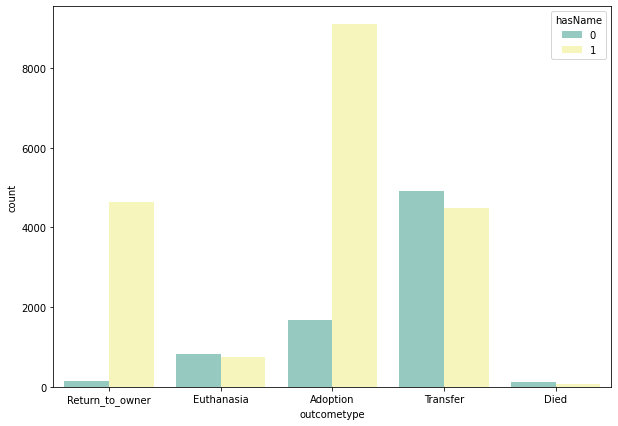

In [77]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_at, x='outcometype',hue='hasName', palette='Set3')

### AGE

In [78]:
train_at.ageuponoutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

### Age in Days

In [79]:
def calc_age_in_days(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 365
    if x.find('month')> -1: return age * 30
    if x.find('week')> -1: return age * 7
    if x.find('day')> -1: return age
    else: return 0

In [80]:
train_at['AgeInDays'] = train_at.ageuponoutcome.apply(calc_age_in_days)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


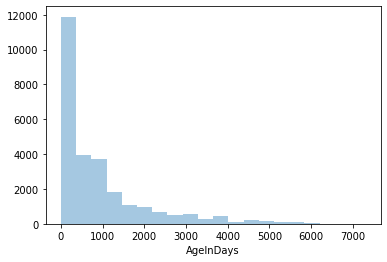

In [81]:
sns.distplot(train_at.AgeInDays, bins = 20, kde=False)

### Is a Puppy?

In [82]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [83]:
train_at = setPuppy(train_at)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


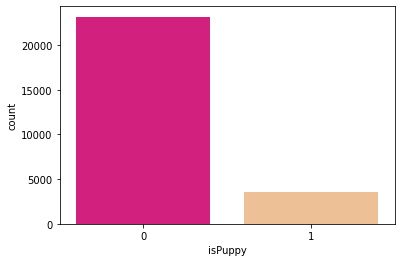

In [84]:
sns.countplot(train_at.isPuppy, palette='Accent_r')

In [85]:
train_at.head()

,outcometype,animaltype,sex,ageuponoutcome,breed,color,hasName,AgeInDays,isPuppy
0,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,365,0
1,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,365,0
2,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,730,0
3,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,21,1
4,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,730,0


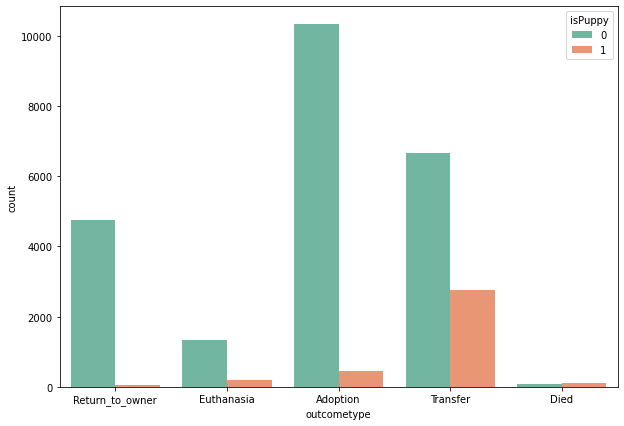

In [86]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_at, x='outcometype',hue='isPuppy', palette='Set2')

### Age in Months

In [87]:
def calc_age_in_months(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 12
    if x.find('month')> -1: return age 
    if x.find('week')> -1: return 0
    if x.find('day')> -1: return 0
    else: return 0

In [88]:
train_at['AgeInMonths'] = train_at.ageuponoutcome.apply(calc_age_in_months)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


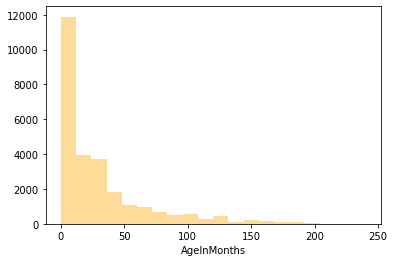

In [89]:
sns.distplot(train_at.AgeInMonths, bins = 20, kde=False, color='orange')

### Age In Years

In [90]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return 0 
    if x.find('week')> -1: return 0
    if x.find('day')> -1: return 0
    else: return 0
train_at['AgeInYears'] = train_at.ageuponoutcome.apply(calc_age_in_years)

train_at = train_at.drop(['ageuponoutcome'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


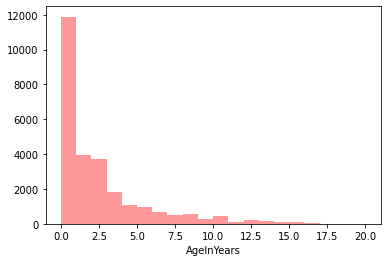

In [91]:
sns.distplot(train_at.AgeInYears, bins = 20, kde=False, color='red')

In [92]:
train_at.head() 

,outcometype,animaltype,sex,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2


### GENDER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


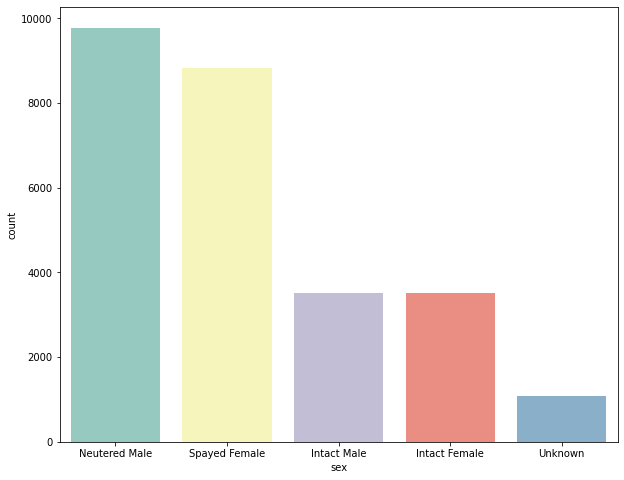

In [93]:
plt.figure(figsize=(10,8))
sns.countplot(train_at.sex, palette='Set3')

**굵은 텍스트**### Is neureted?

In [94]:
def isNeutered(dataFrame):
    dataFrame['Sterilized'] = pd.np.where(dataFrame.sex.str.contains("Neutered"), 1, 
                                          pd.np.where(dataFrame.sex.str.contains("Spayed"), 1, 0))
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Neutered"),"None",
                                   pd.np.where(dataFrame.sex.str.contains("Spayed"),"None",dataFrame['sex']))
    return dataFrame

In [95]:
train_at = isNeutered(train_at)
train_at = setSex(train_at)
test_at = setSex(test_at)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


In [96]:
train_at.head(20)

,outcometype,animaltype,sex,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized
0,Return_to_owner,Dog,None,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,1
1,Euthanasia,Cat,None,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,1
2,Adoption,Dog,None,Pit Bull Mix,Blue/White,1,730,0,24,2,1
3,Transfer,Cat,Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,0
4,Transfer,Dog,None,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,1
5,Transfer,Dog,Female,Cairn Terrier/Chihuahua Shorthair,Black/Tan,1,30,1,1,0,0
6,Transfer,Cat,Male,Domestic Shorthair Mix,Blue Tabby,1,21,1,0,0,0
7,Transfer,Cat,None,Domestic Shorthair Mix,Brown Tabby,0,21,1,0,0,0
8,Adoption,Dog,None,American Pit Bull Terrier Mix,Red/White,1,150,0,5,0,1
9,Adoption,Dog,None,Cairn Terrier,White,0,365,0,12,1,1


In [97]:
train_pf.head()

,animaltype,breed,Breed2,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,AdoptionSpeed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,color,isMultiColor
0,Cat,Tabby,0,Small,Short,No,No,0,100,2,Adoption,Male,1,90,3,0,0,Black/White,1
1,Cat,Domestic medium hair,0,Medium,Medium,Not Sure,Not Sure,0,0,0,Adoption,Male,1,30,1,0,1,Black/Brown,1
2,Dog,Mixed breeds,0,Medium,Medium,Yes,Yes,0,0,3,Adoption,Male,1,30,1,0,1,Brown/White,1
3,Dog,Mixed breeds,0,Medium,Short,Yes,Yes,0,150,2,Adoption,Female,1,120,4,0,0,Black/Brown,1
4,Dog,Mixed breeds,0,Medium,Short,No,No,0,0,2,Adoption,Male,1,30,1,0,1,Black/none,0


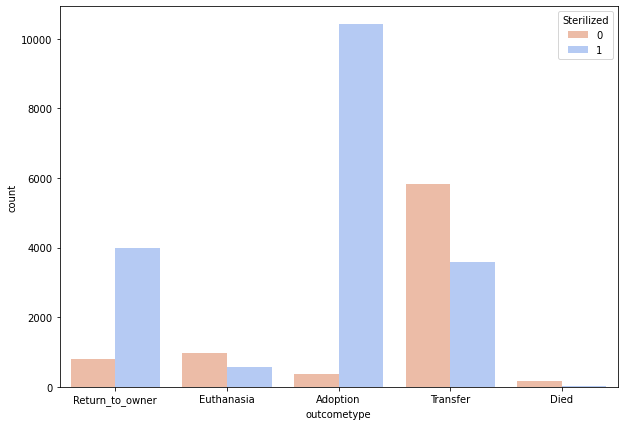

In [98]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train_at, x='outcometype',hue='Sterilized', palette='coolwarm_r')

In [99]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sex.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sex.str.contains("Male"), "Male", "None"))
    return dataFrame

In [100]:
train_at = setSex(train_at)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
train_at.head()

,outcometype,animaltype,sex,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized
0,Return_to_owner,Dog,None,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,1
1,Euthanasia,Cat,None,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,1
2,Adoption,Dog,None,Pit Bull Mix,Blue/White,1,730,0,24,2,1
3,Transfer,Cat,Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,0
4,Transfer,Dog,None,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,1


In [102]:
train_pf.head(30)

,animaltype,breed,Breed2,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,AdoptionSpeed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,color,isMultiColor
0,Cat,Tabby,0,Small,Short,No,No,0,100,2,Adoption,Male,1,90,3,0,0,Black/White,1
1,Cat,Domestic medium hair,0,Medium,Medium,Not Sure,Not Sure,0,0,0,Adoption,Male,1,30,1,0,1,Black/Brown,1
2,Dog,Mixed breeds,0,Medium,Medium,Yes,Yes,0,0,3,Adoption,Male,1,30,1,0,1,Brown/White,1
3,Dog,Mixed breeds,0,Medium,Short,Yes,Yes,0,150,2,Adoption,Female,1,120,4,0,0,Black/Brown,1
4,Dog,Mixed breeds,0,Medium,Short,No,No,0,0,2,Adoption,Male,1,30,1,0,1,Black/none,0
5,Cat,Domestic short hair,0,Medium,Short,No,No,0,0,2,Adoption,Female,1,90,3,0,0,Cream/Gray,1
6,Cat,Domestic long hair,Domestic long hair,Medium,Long,No,No,0,300,1,Adoption,Male,1,360,12,1,0,Black/none,0
7,Dog,Mixed breeds,0,Medium,Short,No,No,0,0,3,Adoption,Female,1,0,0,0,1,Black/Brown,1
8,Cat,Domestic medium hair,0,Medium,Medium,No,No,0,0,1,Adoption,Female,1,60,2,0,0,Gray/none,0
9,Cat,Domestic medium hair,0,Medium,Medium,Not Sure,Not Sure,0,0,4,Adoption,Female,1,360,12,1,0,Black/White,1


### COLOR

In [103]:
color_counts = train_at['color'].value_counts()
color_counts.head(20)

Black/White            2824
Black                  2288
Brown Tabby            1631
Brown Tabby/White       939
White                   930
Brown/White             884
Orange Tabby            841
Tan/White               773
Tricolor                752
Blue/White              702
Black/Tan               672
White/Black             643
Brown                   639
Tan                     628
White/Brown             569
Tortie                  529
Calico                  517
Orange Tabby/White      455
Brown Brindle/White     450
Blue                    449
Name: color, dtype: int64

In [104]:
train_at['isMultiColor'] = train_at['color'].apply(lambda x : 1 if '/' in x else 0)


In [105]:
train_at

,outcometype,animaltype,sex,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized,isMultiColor
0,Return_to_owner,Dog,None,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,1,1
1,Euthanasia,Cat,None,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,1,0
2,Adoption,Dog,None,Pit Bull Mix,Blue/White,1,730,0,24,2,1,1
3,Transfer,Cat,Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,0,0
4,Transfer,Dog,None,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26724,Transfer,Cat,Male,Domestic Shorthair Mix,Brown Tabby/White,0,30,1,1,0,0,1
26725,Transfer,Cat,None,Domestic Shorthair Mix,Brown Tabby,0,90,0,3,0,1,0
26726,Adoption,Dog,None,Old English Bulldog Mix,White/Tan,1,1460,0,48,4,1,1
26727,Transfer,Cat,Male,Domestic Shorthair Mix,Black,0,28,1,0,0,0,0


### Sex

### Drop cleaning

In [106]:
test_at = hasName(test_at)
test_at = test_at.drop(['name'], axis=1)
test_at['AgeInDays'] = test_at.ageuponoutcome.apply(calc_age_in_days)
test_at = setPuppy(test_at)
test_at['AgeInMonths'] = test_at.ageuponoutcome.apply(calc_age_in_months)
test_at = isNeutered(test_at)
test_at['AgeInYears'] = test_at.ageuponoutcome.apply(calc_age_in_years)
test_at = setSex(test_at)
test_at['isMultiColor'] = test_at['color'].apply(lambda x : 1 if '/' in x else 0)
test_at = isNeutered(test_at)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The panda

In [107]:
test_pf

,animaltype,breed,Breed2,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,outcometype,sex,AgeInDays,AgeInMonths,AgeInYears,isPuppy,color,isMultiColor
0,Cat,Domestic short hair,Domestic short hair,Small,Short,Yes,Yes,0,0,Adoption,Male,240,8,0,0,Black/White,1
1,Cat,Persian,Domestic long hair,Medium,Long,Yes,Yes,0,0,Adoption,Female,1080,36,3,0,Black/Brown,1
2,Cat,Domestic medium hair,0,Medium,Medium,Yes,Yes,0,200,Adoption,Male,60,2,0,0,Brown/White,1
3,Dog,Mixed breeds,0,Medium,Medium,Yes,Yes,0,0,Adoption,Female,360,12,1,0,Black/Brown,1
4,Cat,Domestic medium hair,0,Medium,Medium,Yes,Yes,0,0,Adoption,Male,360,12,1,0,Black/none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,Dog,Mixed breeds,Mixed breeds,Medium,Short,Yes,Yes,0,150,Adoption,Male,150,5,0,0,Black/White,1
3968,Dog,Mixed breeds,Mixed breeds,Medium,Short,Not Sure,Yes,0,0,Adoption,Male,900,30,2,0,Golden/White,1
3969,Cat,300,0,Medium,Medium,No,Not Sure,1,0,Adoption,None,150,5,0,0,Brown/none,0
3970,Dog,Mixed breeds,0,Medium,Medium,No,No,0,0,Adoption,Female,720,24,2,0,Black/White,1


Mix or Pure

In [108]:
import re
train_at['breedType'] = train_at.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')
                        
test_at['breedType'] = test_at.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')                        

In [109]:
train_pf['breedType'] = train_pf.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')   

test_pf['breedType'] = test_pf.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')   

In [110]:
train_at = train_at.drop(['color'], axis=1)
test_at = test_at.drop(['color'], axis=1)


train_pf = train_pf.drop(['color'],axis=1)

### BREED

### Top 50 Breeds

In [111]:
train_pf['breedType'] = train_pf.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')

In [112]:
train_at.head()


,outcometype,animaltype,sex,breed,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized,isMultiColor,breedType
0,Return_to_owner,Dog,None,Shetland Sheepdog Mix,1,365,0,12,1,1,1,mix
1,Euthanasia,Cat,None,Domestic Shorthair Mix,1,365,0,12,1,1,0,mix
2,Adoption,Dog,None,Pit Bull Mix,1,730,0,24,2,1,1,mix
3,Transfer,Cat,Male,Domestic Shorthair Mix,0,21,1,0,0,0,0,mix
4,Transfer,Dog,None,Lhasa Apso/Miniature Poodle,0,730,0,24,2,1,0,pure


### Merge

In [113]:
train_pf.head()
train_pf.drop(['Breed2'],axis=1)

,animaltype,breed,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Fee,AdoptionSpeed,outcometype,sex,hasName,AgeInDays,AgeInMonths,AgeInYears,isPuppy,isMultiColor,breedType
0,Cat,Tabby,Small,Short,No,No,0,100,2,Adoption,Male,1,90,3,0,0,1,pure
1,Cat,Domestic medium hair,Medium,Medium,Not Sure,Not Sure,0,0,0,Adoption,Male,1,30,1,0,1,1,pure
2,Dog,Mixed breeds,Medium,Medium,Yes,Yes,0,0,3,Adoption,Male,1,30,1,0,1,1,mix
3,Dog,Mixed breeds,Medium,Short,Yes,Yes,0,150,2,Adoption,Female,1,120,4,0,0,1,mix
4,Dog,Mixed breeds,Medium,Short,No,No,0,0,2,Adoption,Male,1,30,1,0,1,0,mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,Domestic short hair,Medium,Medium,No,No,1,0,2,Adoption,None,1,60,2,0,0,0,pure
14989,Cat,Domestic medium hair,Medium,Medium,Yes,Yes,1,0,4,Adoption,None,1,1800,60,5,0,1,pure
14990,Cat,Domestic medium hair,Large,Medium,No,Yes,1,30,3,Adoption,None,1,60,2,0,0,1,pure
14991,Cat,Domestic short hair,Small,Short,Yes,Yes,0,0,4,Adoption,Female,1,270,9,0,0,1,pure


In [114]:
train_at['outcometype'].value_counts()

Adoption           10769
Transfer            9406
Return_to_owner     4785
Euthanasia          1553
Died                 197
Name: outcometype, dtype: int64

In [115]:
train_at.head()

,outcometype,animaltype,sex,breed,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized,isMultiColor,breedType
0,Return_to_owner,Dog,None,Shetland Sheepdog Mix,1,365,0,12,1,1,1,mix
1,Euthanasia,Cat,None,Domestic Shorthair Mix,1,365,0,12,1,1,0,mix
2,Adoption,Dog,None,Pit Bull Mix,1,730,0,24,2,1,1,mix
3,Transfer,Cat,Male,Domestic Shorthair Mix,0,21,1,0,0,0,0,mix
4,Transfer,Dog,None,Lhasa Apso/Miniature Poodle,0,730,0,24,2,1,0,pure


In [116]:
merge_train = pd.concat([train_at,train_pf],ignore_index=True)
merge_test = pd.concat([test_at,test_pf],ignore_index=True)

merge_train = merge_train.reset_index(drop=True)
merge_test = merge_test.reset_index(drop=True)


In [117]:
merge_train.columns

Index(['outcometype', 'animaltype', 'sex', 'breed', 'hasName', 'AgeInDays',
       'isPuppy', 'AgeInMonths', 'AgeInYears', 'Sterilized', 'isMultiColor',
       'breedType', 'Breed2', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Fee', 'AdoptionSpeed'],
      dtype='object')

In [118]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41703 entries, 0 to 41702
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   outcometype    41703 non-null  object 
 1   animaltype     41703 non-null  object 
 2   sex            41703 non-null  object 
 3   breed          41703 non-null  object 
 4   hasName        41703 non-null  int64  
 5   AgeInDays      41703 non-null  int64  
 6   isPuppy        41703 non-null  int64  
 7   AgeInMonths    41703 non-null  int64  
 8   AgeInYears     41703 non-null  int64  
 9   Sterilized     41703 non-null  int64  
 10  isMultiColor   41703 non-null  int64  
 11  breedType      41703 non-null  object 
 12  Breed2         14993 non-null  object 
 13  MaturitySize   14993 non-null  object 
 14  FurLength      14993 non-null  object 
 15  Vaccinated     14993 non-null  object 
 16  Dewormed       14993 non-null  object 
 17  Fee            14993 non-null  float64
 18  Adopti

In [119]:
merge_train = merge_train.drop(['Breed2'],axis=1)


In [120]:
merge_train.isnull().sum()

outcometype          0
animaltype           0
sex                  0
breed                0
hasName              0
AgeInDays            0
isPuppy              0
AgeInMonths          0
AgeInYears           0
Sterilized           0
isMultiColor         0
breedType            0
MaturitySize     26710
FurLength        26710
Vaccinated       26710
Dewormed         26710
Fee              26710
AdoptionSpeed    26710
dtype: int64

In [121]:
merge_train['outcometype'].value_counts()

Adoption           25762
Transfer            9406
Return_to_owner     4785
Euthanasia          1553
Died                 197
Name: outcometype, dtype: int64

In [122]:
merge_train

,outcometype,animaltype,sex,breed,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized,isMultiColor,breedType,MaturitySize,FurLength,Vaccinated,Dewormed,Fee,AdoptionSpeed
0,Return_to_owner,Dog,None,Shetland Sheepdog Mix,1,365,0,12,1,1,1,mix,NaN,NaN,NaN,NaN,NaN,NaN
1,Euthanasia,Cat,None,Domestic Shorthair Mix,1,365,0,12,1,1,0,mix,NaN,NaN,NaN,NaN,NaN,NaN
2,Adoption,Dog,None,Pit Bull Mix,1,730,0,24,2,1,1,mix,NaN,NaN,NaN,NaN,NaN,NaN
3,Transfer,Cat,Male,Domestic Shorthair Mix,0,21,1,0,0,0,0,mix,NaN,NaN,NaN,NaN,NaN,NaN
4,Transfer,Dog,None,Lhasa Apso/Miniature Poodle,0,730,0,24,2,1,0,pure,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41698,Adoption,Cat,None,Domestic short hair,1,60,0,2,0,1,0,pure,Medium,Medium,No,No,0.0,2.0
41699,Adoption,Cat,None,Domestic medium hair,1,1800,0,60,5,1,1,pure,Medium,Medium,Yes,Yes,0.0,4.0
41700,Adoption,Cat,None,Domestic medium hair,1,60,0,2,0,1,1,pure,Large,Medium,No,Yes,30.0,3.0
41701,Adoption,Cat,Female,Domestic short hair,1,270,0,9,0,0,1,pure,Small,Short,Yes,Yes,0.0,4.0


In [123]:
for column in merge_train.columns:
    merge_train[column].fillna(merge_train[column].mode()[0], inplace=True)

merge_train.isnull().sum()

outcometype      0
animaltype       0
sex              0
breed            0
hasName          0
AgeInDays        0
isPuppy          0
AgeInMonths      0
AgeInYears       0
Sterilized       0
isMultiColor     0
breedType        0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Fee              0
AdoptionSpeed    0
dtype: int64

In [124]:
merge_train.AdoptionSpeed.value_counts() 

4.0    30907
2.0     4037
3.0     3259
1.0     3090
0.0      410
Name: AdoptionSpeed, dtype: int64

### 입양이 안 된 친구들을 대상으로 하는 (셀 수 없는의) 5.0이 필요하지 않을까?

In [125]:
# cats_train = merge_train.loc[merge_train['animaltype'] == 'Cat']
# cats_test = merge_test.loc[merge_train['animaltype'] == 'Cat']

# cats_train = cats_train.reset_index(drop=True)
# cats_test = cats_test.reset_index(drop=True)

In [126]:
# cats_train.head()

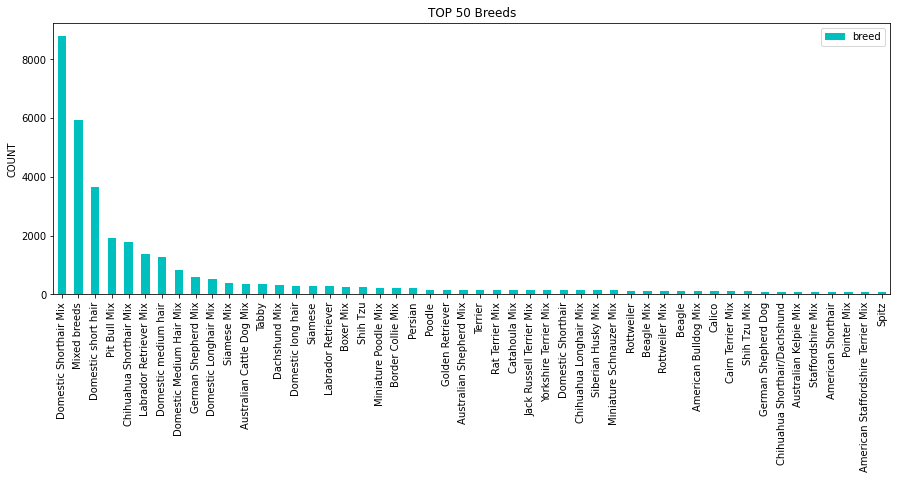

In [127]:
fig = plt.figure(figsize=(15,5))
plt.title('TOP 50 Breeds')
plt.ylabel('COUNT')
merge_train['breed'].value_counts()[:50].plot(kind='bar', color='c')
plt.legend()
plt.show()

In [128]:
n = 50
mostCommonBreeds = merge_train['breed'].value_counts()[:n].index.tolist()
merge_train['breedIs'] = 'other'
merge_test['breedIs'] = 'other'

for i in mostCommonBreeds:
  merge_train['breedIs'][merge_train['breed'] == i] = i
  merge_test['breedIs'][merge_test['breed'] == i] = i

merge_train = merge_train.drop(['breed'], axis=1)
merge_test = merge_test.drop(['breed'], axis=1)

merge_train = merge_train.reset_index(drop=True)
merge_test = merge_test.reset_index(drop=True)


# merged_dataset = pd.concat([merge_train, merge_test],ignore_index=True)
# merge_train = merge_train.reset_index(drop=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
# merged_dataset = pd.concat([merge_train, merge_test],ignore_index=True)
# merged_dataset = merged_dataset.reset_index(drop=True)

In [130]:
# merged_dataset

In [131]:
merge_train

,outcometype,animaltype,sex,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,Sterilized,isMultiColor,breedType,MaturitySize,FurLength,Vaccinated,Dewormed,Fee,AdoptionSpeed,breedIs
0,Return_to_owner,Dog,None,1,365,0,12,1,1,1,mix,Medium,Short,No,Yes,0.0,4.0,other
1,Euthanasia,Cat,None,1,365,0,12,1,1,0,mix,Medium,Short,No,Yes,0.0,4.0,Domestic Shorthair Mix
2,Adoption,Dog,None,1,730,0,24,2,1,1,mix,Medium,Short,No,Yes,0.0,4.0,Pit Bull Mix
3,Transfer,Cat,Male,0,21,1,0,0,0,0,mix,Medium,Short,No,Yes,0.0,4.0,Domestic Shorthair Mix
4,Transfer,Dog,None,0,730,0,24,2,1,0,pure,Medium,Short,No,Yes,0.0,4.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41698,Adoption,Cat,None,1,60,0,2,0,1,0,pure,Medium,Medium,No,No,0.0,2.0,Domestic short hair
41699,Adoption,Cat,None,1,1800,0,60,5,1,1,pure,Medium,Medium,Yes,Yes,0.0,4.0,Domestic medium hair
41700,Adoption,Cat,None,1,60,0,2,0,1,1,pure,Large,Medium,No,Yes,30.0,3.0,Domestic medium hair
41701,Adoption,Cat,Female,1,270,0,9,0,0,1,pure,Small,Short,Yes,Yes,0.0,4.0,Domestic short hair


## Divide dogs and cats train/valid/test

### dogs

In [132]:
dogs = merge_train.loc[merge_train['animaltype'] == 'Dog']
dogs = dogs.drop(['animaltype'], axis=1)
dogs = dogs.reset_index(drop=True)

In [133]:
if "Set" not in dogs.columns:
    dogs["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(dogs.shape[0],))

In [134]:
dogs_train_indices = dogs[dogs.Set=="train"].index
dogs_valid_indices = dogs[dogs.Set=="valid"].index
dogs_test_indices = dogs[dogs.Set=="test"].index

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
nunique = dogs.nunique()
types = dogs.dtypes

categorical_columns = []
categorical_dims =  {}
for col in dogs.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, dogs[col].nunique())
        l_enc = LabelEncoder()
        dogs[col] = dogs[col].fillna("VV_likely")
        dogs[col] = l_enc.fit_transform(dogs[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
        # dogs[col] = l_enc.inverse_transform(dogs[col].values)

    else:
        dogs.fillna(dogs.loc[dogs_train_indices, col].mean(), inplace=True)

outcometype 5
sex 3
hasName 2
AgeInDays 131
isPuppy 2
AgeInMonths 106
AgeInYears 21
Sterilized 2
isMultiColor 2
breedType 2
MaturitySize 4
FurLength 3
Vaccinated 3
Dewormed 3
Fee 61
AdoptionSpeed 5
breedIs 38
Set 3


In [137]:
unsued_feat = ['Set']
target = 'outcometype'


dogs_features = [ col for col in dogs.columns if col not in unsued_feat+[target]]
print(len(dogs_features),dogs_features)

dogs_cat_idxs = [ i for i, f in enumerate(dogs_features) if f in categorical_columns]
print(len(dogs_cat_idxs),dogs_cat_idxs)

dogs_cat_dims = [categorical_dims[f] for i, f in enumerate(dogs_features) if f in categorical_columns]
print(len(dogs_cat_dims),dogs_cat_dims)



16 ['sex', 'hasName', 'AgeInDays', 'isPuppy', 'AgeInMonths', 'AgeInYears', 'Sterilized', 'isMultiColor', 'breedType', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Fee', 'AdoptionSpeed', 'breedIs']
16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16 [3, 2, 131, 2, 106, 21, 2, 2, 2, 4, 3, 3, 3, 61, 5, 38]


In [138]:
X_train_dogs = dogs[dogs_features].values[dogs_train_indices]
y_train_dogs = dogs[target].values[dogs_train_indices]

X_valid_dogs = dogs[dogs_features].values[dogs_valid_indices]
y_valid_dogs = dogs[target].values[dogs_valid_indices]

X_test_dogs = dogs[dogs_features].values[dogs_test_indices]
y_test_dogs = dogs[target].values[dogs_test_indices]

###Cats

In [139]:
cats = merge_train.loc[merge_train['animaltype'] == 'Cat']
cats = cats.drop(['animaltype'], axis=1)
cats = cats.reset_index(drop=True)

cats = merge_train.loc[merge_train['animaltype'] == 'Cat']
cats = cats.drop(['animaltype'], axis=1)
cats = cats.reset_index(drop=True)

In [140]:
if "Set" not in cats.columns:
    cats["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(cats.shape[0],))

In [141]:
cats_train_indices = cats[cats.Set=="train"].index
cats_valid_indices = cats[cats.Set=="valid"].index
cats_test_indices = cats[cats.Set=="test"].index

In [142]:
nunique = cats.nunique()
types = cats.dtypes

categorical_columns = []
categorical_dims =  {}
for col in cats.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, cats[col].nunique())
        l_enc = LabelEncoder()
        cats[col] = cats[col].fillna("VV_likely")
        cats[col] = l_enc.fit_transform(cats[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
        # cats[col] = l_enc.inverse_transform(cats[col].values)

    else:
        cats.fillna(cats.loc[cats_train_indices, col].mean(), inplace=True)

outcometype 5
sex 3
hasName 2
AgeInDays 102
isPuppy 2
AgeInMonths 79
AgeInYears 21
Sterilized 2
isMultiColor 2
breedType 2
MaturitySize 4
FurLength 3
Vaccinated 3
Dewormed 3
Fee 51
AdoptionSpeed 5
breedIs 17
Set 3


In [143]:
unsued_feat = ['Set']
target = 'outcometype'

cats_features = [ col for col in cats.columns if col not in unsued_feat+[target]]
print(len(cats_features),cats_features)

cats_cat_idxs = [ i for i, f in enumerate(cats_features) if f in categorical_columns]
print(len(cats_cat_idxs),cats_cat_idxs)

cats_cat_dims = [categorical_dims[f] for i, f in enumerate(cats_features) if f in categorical_columns]
print(len(cats_cat_dims),cats_cat_dims)



16 ['sex', 'hasName', 'AgeInDays', 'isPuppy', 'AgeInMonths', 'AgeInYears', 'Sterilized', 'isMultiColor', 'breedType', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Fee', 'AdoptionSpeed', 'breedIs']
16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16 [3, 2, 102, 2, 79, 21, 2, 2, 2, 4, 3, 3, 3, 51, 5, 17]


In [144]:
X_train_cats = cats[cats_features].values[cats_train_indices]
y_train_cats = cats[target].values[cats_train_indices]

X_valid_cats = cats[cats_features].values[cats_valid_indices]
y_valid_cats = cats[target].values[cats_valid_indices]

X_test_cats = cats[cats_features].values[cats_test_indices]
y_test_cats = cats[target].values[cats_test_indices]



# MODELS

In [145]:
!pip install pytorch-tabnet

## Imports

In [146]:
!pip install --quiet optuna

     |████████████████████████████████| 308 kB 8.3 MB/s 
     |████████████████████████████████| 81 kB 11.0 MB/s 
     |████████████████████████████████| 210 kB 85.7 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 112 kB 78.4 MB/s 
     |████████████████████████████████| 49 kB 7.2 MB/s 
     |████████████████████████████████| 146 kB 73.3 MB/s 


In [147]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.metrics import Metric
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
import torch.nn as nn
import torch.nn.functional as F

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline, FeatureUnion
# from catboost import CatBoostRegressor
import lightgbm as lgb
import optuna
from optuna import Trial, visualization

In [148]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
np.random.seed(0)


import os
from pathlib import Path

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload

%autoreload 2

In [149]:
%reload_ext autoreload


CTest datasının kedi ve köpeklere ayrılması

In [150]:
if "Set" not in merge_train.columns:
    merge_train["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(merge_train.shape[0],))

In [151]:
train_indices = merge_train[merge_train.Set=="train"].index
valid_indices = merge_train[merge_train.Set=="valid"].index
test_indices = merge_train[merge_train.Set=="test"].index

In [152]:
tr_len = len(train_indices)
val_len = len(valid_indices)
test_len = len(test_indices)
print(tr_len)
print(val_len)
print(test_len)

33389
4139
4175


In [153]:
len(train_indices)

33389

In [154]:
merge_train.dtypes

outcometype       object
animaltype        object
sex               object
hasName            int64
AgeInDays          int64
isPuppy            int64
AgeInMonths        int64
AgeInYears         int64
Sterilized         int64
isMultiColor       int64
breedType         object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Fee              float64
AdoptionSpeed    float64
breedIs           object
Set               object
dtype: object

In [155]:
merge_train.Sterilized

0        1
1        1
2        1
3        0
4        1
        ..
41698    1
41699    1
41700    1
41701    0
41702    0
Name: Sterilized, Length: 41703, dtype: int64

In [156]:
nunique = merge_train.nunique()
nunique 


outcometype        5
animaltype         2
sex                3
hasName            2
AgeInDays        136
isPuppy            2
AgeInMonths      111
AgeInYears        22
Sterilized         2
isMultiColor       2
breedType          2
MaturitySize       4
FurLength          3
Vaccinated         3
Dewormed           3
Fee               74
AdoptionSpeed      5
breedIs           51
Set                3
dtype: int64

In [157]:
nunique = merge_train.nunique()
types = merge_train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in merge_train.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, merge_train[col].nunique())
        l_enc = LabelEncoder()
        merge_train[col] = merge_train[col].fillna("VV_likely")
        merge_train[col] = l_enc.fit_transform(merge_train[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
        # merge_train[col] = l_enc.inverse_transform(merge_train[col].values)

    else:
        merge_train.fillna(merge_train.loc[train_indices, col].mean(), inplace=True)

outcometype 5
animaltype 2
sex 3
hasName 2
AgeInDays 136
isPuppy 2
AgeInMonths 111
AgeInYears 22
Sterilized 2
isMultiColor 2
breedType 2
MaturitySize 4
FurLength 3
Vaccinated 3
Dewormed 3
Fee 74
AdoptionSpeed 5
breedIs 51
Set 3


In [158]:
merge_train['outcometype'] .head(10)

0    3
1    2
2    0
3    4
4    4
5    4
6    4
7    4
8    0
9    0
Name: outcometype, dtype: int64

In [159]:
merge_train['outcometype'] .head(10)

0    3
1    2
2    0
3    4
4    4
5    4
6    4
7    4
8    0
9    0
Name: outcometype, dtype: int64

In [160]:
unsued_feat = ['Set']
target = 'outcometype'
features = [ col for col in merge_train.columns if col not in unsued_feat+[target]]
print(len(features),features)

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_idxs),cat_idxs)

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
print(len(cat_dims),cat_dims)

17 ['animaltype', 'sex', 'hasName', 'AgeInDays', 'isPuppy', 'AgeInMonths', 'AgeInYears', 'Sterilized', 'isMultiColor', 'breedType', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Fee', 'AdoptionSpeed', 'breedIs']
17 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
17 [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]


In [161]:
features

['animaltype',
 'sex',
 'hasName',
 'AgeInDays',
 'isPuppy',
 'AgeInMonths',
 'AgeInYears',
 'Sterilized',
 'isMultiColor',
 'breedType',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Fee',
 'AdoptionSpeed',
 'breedIs']

##train,valid,test set


In [162]:
X_train = merge_train[features].values[train_indices]
y_train = merge_train[target].values[train_indices]

X_valid = merge_train[features].values[valid_indices]
y_valid = merge_train[target].values[valid_indices]

X_test = merge_train[features].values[test_indices]
y_test = merge_train[target].values[test_indices]

In [163]:
merge_train.outcometype.value_counts()

0    25762
4     9406
3     4785
2     1553
1      197
Name: outcometype, dtype: int64

In [164]:
y_test.shape

(4175,)

In [165]:
y_test

array([0, 3, 4, ..., 0, 0, 0])

In [166]:
# merge_test[features].values

In [167]:
y_train

array([3, 2, 0, ..., 0, 0, 0])

In [168]:
X_train

array([[ 1,  2,  1, ...,  0,  4, 50],
       [ 0,  2,  1, ...,  0,  4, 20],
       [ 1,  2,  1, ...,  0,  4, 34],
       ...,
       [ 0,  2,  1, ...,  0,  4, 22],
       [ 0,  2,  1, ..., 11,  3, 22],
       [ 1,  1,  1, ...,  0,  3, 32]])

In [169]:
train_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     9,    10,
               11,
            ...
            41688, 41690, 41691, 41692, 41694, 41695, 41697, 41699, 41700,
            41702],
           dtype='int64', length=33389)

In [170]:
# test = test.drop(['breed'], axis=1)
# test_cats = test.loc[test['animaltype'] == 'Cat']
# cat_ids = test_cats['id']

# test_cats = test_cats.drop('id', axis = 1)
# test_cats = pd.get_dummies(test_cats)

# test = test.drop('id', axis = 1)
# test = pd.get_dummies(test)

In [171]:
# from tqdm.notebook import tqdm

# nunique = cats.nunique()
# types = cats.dtypes

# categorical_columns = []
# categorical_dims =  {}
# for col in tqdm(cats.columns):
#     if types[col] == 'object' or nunique[col] < 200:
#         print(col, cats[col].nunique())
#         l_enc = LabelEncoder()
#         cats[col] = cats[col].fillna("NaN")
#         cats[col] = l_enc.fit_transform(cats[col].values)
#         try:
#             cats[col] = cats[col].fillna("NaN")
#             cats[col] = l_enc.transform(cats[col].values)
#         except:
#             print(f"Column {col} does not exist in test set")
#         categorical_columns.append(col)
#         categorical_dims[col] = len(l_enc.classes_)
#     else:
#         training_mean = cats.loc[cats, col].mean()
#         train.fillna(training_mean, inplace=True)
#         test.fillna(training_mean, inplace=True)

##Training

In [172]:
from pytorch_tabnet.metrics import Metric

class F1Weighted(Metric):
    def __init__(self):
        self._name = "f1_weighted"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

###Tabnet Supervised learning

####Dog&Cat

In [173]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       cat_idxs=cat_idxs,
                       cat_dims=cat_dims,                       
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [174]:
max_epochs = 1000
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=max_epochs , patience=20,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=True,
    
) 

epoch 0  | loss: 1.33411 | train_logloss: 1.41853 | train_f1_weighted: 0.46126 | valid_logloss: 1.41363 | valid_f1_weighted: 0.46689 |  0:00:05s
epoch 1  | loss: 1.0962  | train_logloss: 1.23684 | train_f1_weighted: 0.50516 | valid_logloss: 1.23564 | valid_f1_weighted: 0.51546 |  0:00:10s
epoch 2  | loss: 1.04887 | train_logloss: 1.01223 | train_f1_weighted: 0.58313 | valid_logloss: 1.01309 | valid_f1_weighted: 0.58185 |  0:00:15s
epoch 3  | loss: 1.02931 | train_logloss: 0.91769 | train_f1_weighted: 0.63873 | valid_logloss: 0.92958 | valid_f1_weighted: 0.62367 |  0:00:19s
epoch 4  | loss: 1.02216 | train_logloss: 0.85845 | train_f1_weighted: 0.68591 | valid_logloss: 0.85759 | valid_f1_weighted: 0.6718  |  0:00:23s
epoch 5  | loss: 0.99564 | train_logloss: 0.8553  | train_f1_weighted: 0.64325 | valid_logloss: 0.86788 | valid_f1_weighted: 0.63721 |  0:00:28s
epoch 6  | loss: 0.9841  | train_logloss: 0.82337 | train_f1_weighted: 0.66906 | valid_logloss: 0.83041 | valid_f1_weighted: 0.667

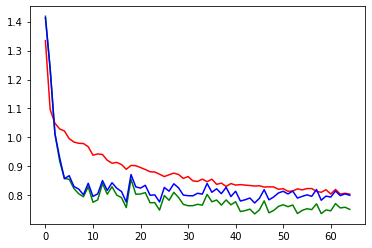

In [175]:
plt.plot(clf.history['loss'],'r')
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [176]:
preds = clf.predict_proba(X_test)
print('Tabnet_AUROC_score : ', round(roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr'),3) )
print('Tabent_accuracy_score : ',round(accuracy_score(y_true=y_test,y_pred=clf.predict(X_test)),3))

Tabnet_AUROC_score :  0.87
Tabent_accuracy_score :  0.666


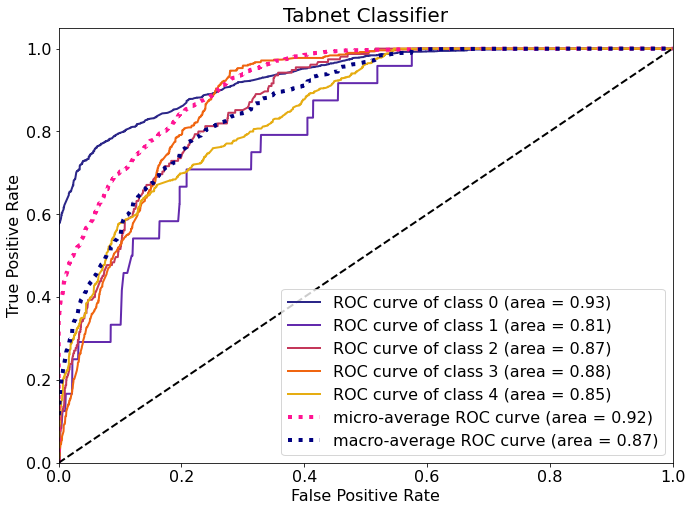

In [177]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabnet Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [178]:
y_pred = clf.predict(X_test)
print('tabnet_f1 score weighted',round(f1_score(y_test, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print('tabnet_f1 score micro',round(f1_score(y_test, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print('tabnet_f1 score macro',round(f1_score(y_test, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

tabnet_f1 score weighted 0.701
tabnet_f1 score micro 0.666
tabnet_f1 score macro 0.435


####Dogs

In [179]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       cat_idxs=dogs_cat_idxs,
                       cat_dims=dogs_cat_dims,                       
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [180]:
max_epochs = 1000
clf.fit(
    X_train=X_train_dogs, y_train=y_train_dogs,
    eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=max_epochs , patience=20,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
) 

epoch 0  | loss: 1.50246 | train_logloss: 1.56381 | train_f1_weighted: 0.41495 | valid_logloss: 1.55755 | valid_f1_weighted: 0.41895 |  0:00:02s
epoch 1  | loss: 1.24026 | train_logloss: 1.33003 | train_f1_weighted: 0.52047 | valid_logloss: 1.30556 | valid_f1_weighted: 0.52688 |  0:00:04s
epoch 2  | loss: 1.15346 | train_logloss: 1.22694 | train_f1_weighted: 0.54205 | valid_logloss: 1.22009 | valid_f1_weighted: 0.55311 |  0:00:07s
epoch 3  | loss: 1.11017 | train_logloss: 1.1671  | train_f1_weighted: 0.58804 | valid_logloss: 1.14888 | valid_f1_weighted: 0.59003 |  0:00:09s
epoch 4  | loss: 1.06038 | train_logloss: 1.20068 | train_f1_weighted: 0.56017 | valid_logloss: 1.19984 | valid_f1_weighted: 0.56299 |  0:00:11s
epoch 5  | loss: 1.00902 | train_logloss: 1.13427 | train_f1_weighted: 0.62001 | valid_logloss: 1.10715 | valid_f1_weighted: 0.63167 |  0:00:14s
epoch 6  | loss: 0.98695 | train_logloss: 1.12494 | train_f1_weighted: 0.59916 | valid_logloss: 1.11345 | valid_f1_weighted: 0.610

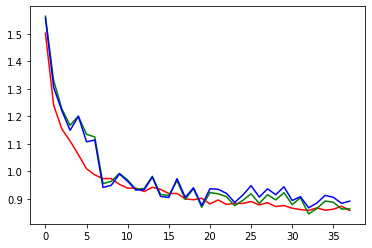

In [181]:
plt.plot(clf.history['loss'],'r')
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [182]:
print('Tabnet_AUROC_score : ', round(roc_auc_score(y_score= clf.predict_proba(X_test_dogs), y_true=y_test_dogs, multi_class='ovr'),3) )
print('Tabent_accuracy_score : ',round(accuracy_score(y_true=y_test_dogs, y_pred= clf.predict(X_test_dogs)),3) )

Tabnet_AUROC_score :  0.816
Tabent_accuracy_score :  0.606


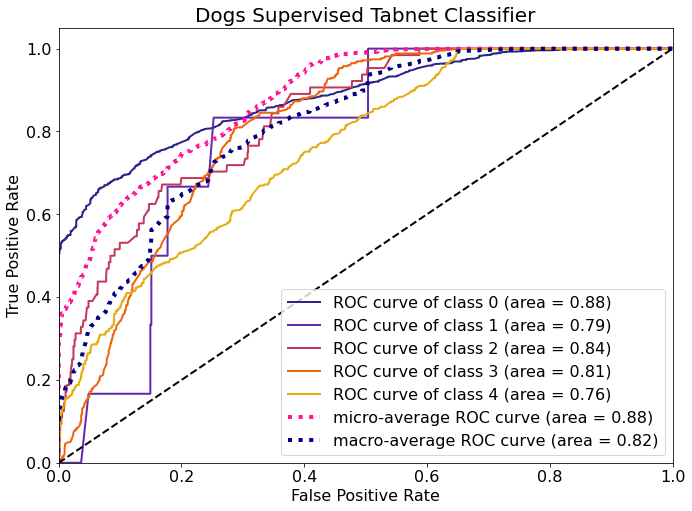

In [183]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test_dogs, clf.predict_proba(X_test_dogs), title='Dogs Supervised Tabnet Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [184]:
y_pred = clf.predict(X_test_dogs)
print('tabnet_f1 score weighted',round(f1_score(y_test_dogs, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print('tabnet_f1 score micro',round(f1_score(y_test_dogs, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print('tabnet_f1 score macro',round(f1_score(y_test_dogs, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

tabnet_f1 score weighted 0.645
tabnet_f1 score micro 0.606
tabnet_f1 score macro 0.369


#### Cats

In [185]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       cat_idxs=cats_cat_idxs,
                       cat_dims=cats_cat_dims,                       
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [186]:
max_epochs = 1000
clf.fit(
    X_train=X_train_cats, y_train=y_train_cats,
    eval_set=[(X_train_cats, y_train_cats), (X_valid_cats, y_valid_cats)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=max_epochs , patience=20,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=True,
    
) 

epoch 0  | loss: 1.33239 | train_logloss: 1.65191 | train_f1_weighted: 0.18692 | valid_logloss: 1.64635 | valid_f1_weighted: 0.19554 |  0:00:01s
epoch 1  | loss: 1.08974 | train_logloss: 1.3948  | train_f1_weighted: 0.51356 | valid_logloss: 1.40342 | valid_f1_weighted: 0.50707 |  0:00:03s
epoch 2  | loss: 1.03217 | train_logloss: 1.2973  | train_f1_weighted: 0.3802  | valid_logloss: 1.28873 | valid_f1_weighted: 0.38497 |  0:00:05s
epoch 3  | loss: 1.00715 | train_logloss: 1.18624 | train_f1_weighted: 0.5753  | valid_logloss: 1.16033 | valid_f1_weighted: 0.59149 |  0:00:07s
epoch 4  | loss: 0.97231 | train_logloss: 1.2853  | train_f1_weighted: 0.54522 | valid_logloss: 1.27086 | valid_f1_weighted: 0.55583 |  0:00:08s
epoch 5  | loss: 0.96118 | train_logloss: 1.0345  | train_f1_weighted: 0.65777 | valid_logloss: 1.00694 | valid_f1_weighted: 0.66394 |  0:00:10s
epoch 6  | loss: 0.9498  | train_logloss: 0.90436 | train_f1_weighted: 0.67146 | valid_logloss: 0.90206 | valid_f1_weighted: 0.678

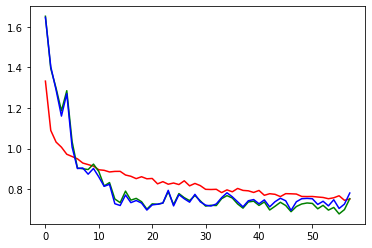

In [187]:
plt.plot(clf.history['loss'],'r')
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [188]:
print('Tabnet_AUROC_score : ', round(roc_auc_score(y_score= clf.predict_proba(X_test_cats), y_true=y_test_cats, multi_class='ovr'),3) )
print('Tabent_accuracy_score : ',round(accuracy_score(y_true=y_test_cats, y_pred= clf.predict(X_test_cats)),3) )

Tabnet_AUROC_score :  0.895
Tabent_accuracy_score :  0.72


In [189]:
preds = clf.predict_proba(X_test_cats)
roc_auc_score(y_score=preds, y_true=y_test_cats,multi_class='ovr') 

0.8947622015391952

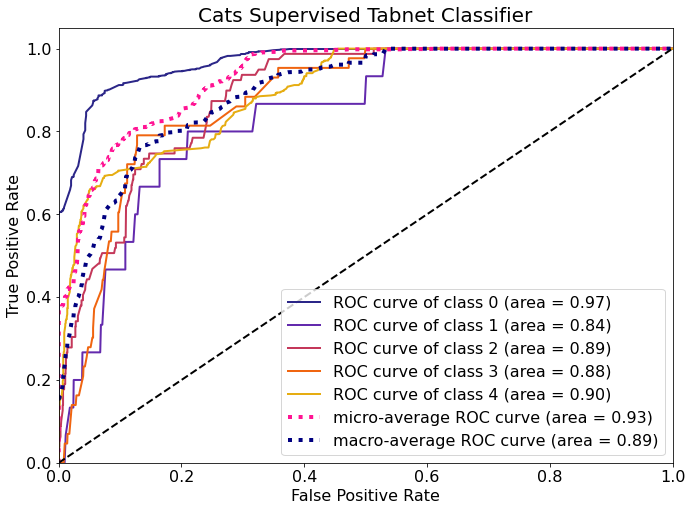

In [190]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test_cats, clf.predict_proba(X_test_cats), title='Cats Supervised Tabnet Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

In [191]:
y_pred = clf.predict(X_test_cats)
print('tabnet_f1 score weighted',round(f1_score(y_test_cats, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print('tabnet_f1 score micro',round(f1_score(y_test_cats, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print('tabnet_f1 score macro',round(f1_score(y_test_cats, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

tabnet_f1 score weighted 0.771
tabnet_f1 score micro 0.72
tabnet_f1 score macro 0.432


###Tabnet self_supervised learning


####Dog&Cat

In [192]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [193]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)


unsupervised_model.fit(
    X_train = X_train,
    eval_set=[X_valid],
    pretraining_ratio = 0.8,
    drop_last=True,
)

Device used : cuda
epoch 0  | loss: 1504.21401| val_0_unsup_loss: 1.03599 |  0:00:02s
epoch 1  | loss: 1.02249 | val_0_unsup_loss: 0.9966  |  0:00:05s
epoch 2  | loss: 0.98958 | val_0_unsup_loss: 0.97415 |  0:00:07s
epoch 3  | loss: 0.9583  | val_0_unsup_loss: 0.90043 |  0:00:10s
epoch 4  | loss: 0.9126  | val_0_unsup_loss: 0.82473 |  0:00:12s
epoch 5  | loss: 0.86092 | val_0_unsup_loss: 0.74831 |  0:00:15s
epoch 6  | loss: 0.81918 | val_0_unsup_loss: 0.67036 |  0:00:17s
epoch 7  | loss: 0.77776 | val_0_unsup_loss: 0.61858 |  0:00:20s
epoch 8  | loss: 0.74542 | val_0_unsup_loss: 0.58361 |  0:00:23s
epoch 9  | loss: 0.7117  | val_0_unsup_loss: 0.54584 |  0:00:25s
epoch 10 | loss: 0.67464 | val_0_unsup_loss: 0.51118 |  0:00:28s
epoch 11 | loss: 0.64144 | val_0_unsup_loss: 0.48487 |  0:00:30s
epoch 12 | loss: 0.60693 | val_0_unsup_loss: 0.47909 |  0:00:33s
epoch 13 | loss: 0.58358 | val_0_unsup_loss: 0.44143 |  0:00:35s
epoch 14 | loss: 0.5562  | val_0_unsup_loss: 0.39001 |  0:00:38s
epoc

In [194]:
reconstructed_X, embedded_X = unsupervised_model.predict(X_valid)
assert(reconstructed_X.shape==embedded_X.shape)

In [195]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_valid)


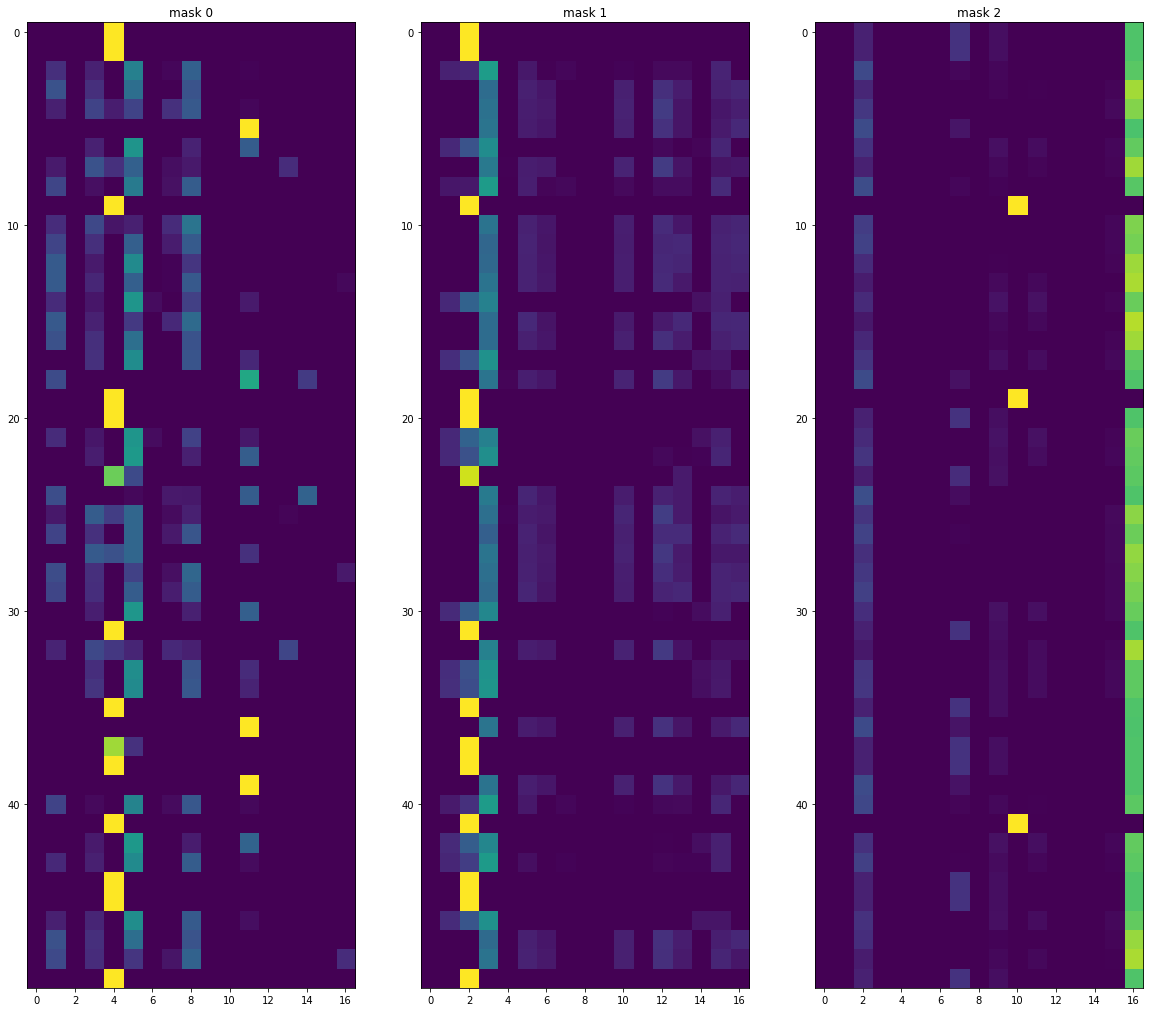

In [196]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [197]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

Successfully saved model at ./test_pretrain.zip
Device used : cuda
Device used : cuda


In [198]:
from pytorch_tabnet.metrics import Metric

class F1Weighted(Metric):
    def __init__(self):
        self._name = "f1_weighted"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

In [199]:
max_epochs = 1000
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=max_epochs , patience=20,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
) 

Loading weights from unsupervised pretraining


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.18475 | train_logloss: 1.19636 | train_f1_weighted: 0.56513 | valid_logloss: 1.17414 | valid_f1_weighted: 0.57578 |  0:00:04s
epoch 1  | loss: 1.05232 | train_logloss: 0.84142 | train_f1_weighted: 0.68862 | valid_logloss: 0.84621 | valid_f1_weighted: 0.68749 |  0:00:08s
epoch 2  | loss: 1.01267 | train_logloss: 0.79766 | train_f1_weighted: 0.68201 | valid_logloss: 0.80638 | valid_f1_weighted: 0.68093 |  0:00:12s
epoch 3  | loss: 0.99207 | train_logloss: 0.8523  | train_f1_weighted: 0.67012 | valid_logloss: 0.86179 | valid_f1_weighted: 0.66576 |  0:00:16s
epoch 4  | loss: 0.96018 | train_logloss: 0.83299 | train_f1_weighted: 0.67317 | valid_logloss: 0.84365 | valid_f1_weighted: 0.679   |  0:00:21s
epoch 5  | loss: 0.93448 | train_logloss: 0.82447 | train_f1_weighted: 0.66853 | valid_logloss: 0.84115 | valid_f1_weighted: 0.66809 |  0:00:25s
epoch 6  | loss: 0.9199  | train_logloss: 0.8634  | train_f1_weighted: 0.66768 | valid_logloss: 0.88681 | valid_f1_weighted: 0.666

In [200]:
X_valid.shape

(4139, 17)

In [201]:
y_train.shape

(33389,)

#### TabNet_Feature Importance

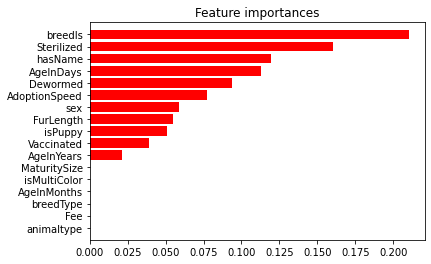

In [202]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

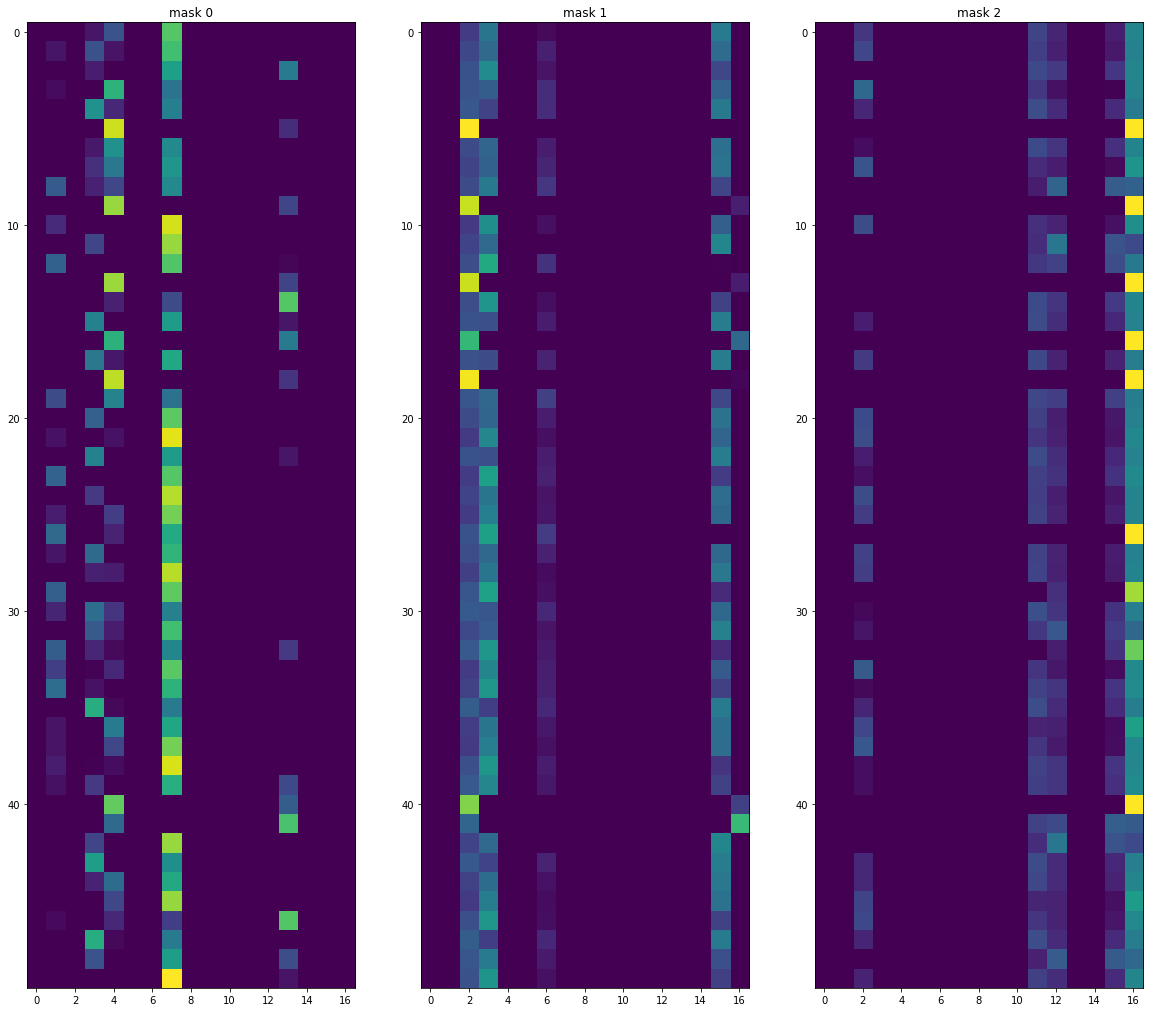

In [203]:
explain_matrix, masks = clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet loss graph

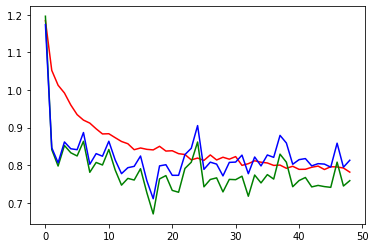

In [204]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

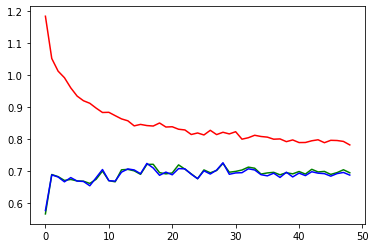

In [205]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


In [206]:
preds = clf.predict_proba(X_test)
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovo') 

0.8148880686731348

In [207]:
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest

0.8700614849502681

#### tabnet roc graph


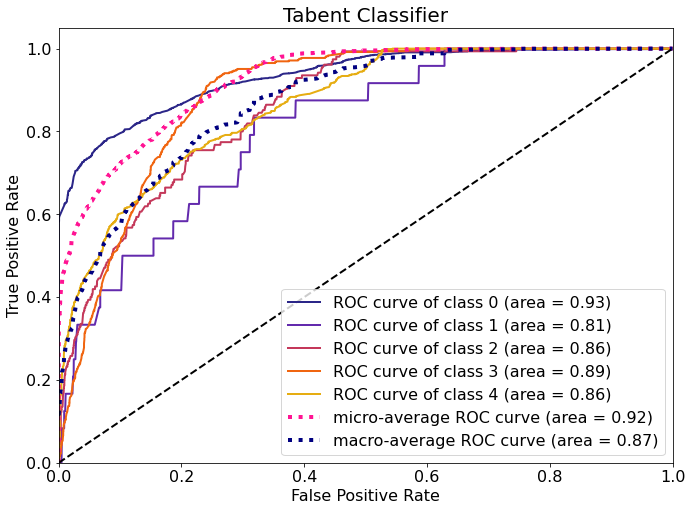

In [208]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [209]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

BEST VALID SCORE FOR Cat+Dog : 0.9102558424007959
FINAL TEST SCORE FOR Cat+Dog : 0.9080030310711915


#### tabnet F1 score

In [210]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, y_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, y_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

0.7170170790062353
0.682874251497006
0.45544171588888177


####Dog

f1_score(y_test, y_pred, average='macro') # 불균형을 고려하지 않음

### tabnet Tuning

In [211]:
from sklearn.model_selection import KFold
import optuna
from optuna import Trial, visualization


In [212]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [213]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)

unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

Device used : cuda
epoch 0  | loss: 5.18089 | val_0_unsup_loss: 1.47145 |  0:00:01s
epoch 1  | loss: 1.16496 | val_0_unsup_loss: 1.07619 |  0:00:02s
epoch 2  | loss: 1.00864 | val_0_unsup_loss: 0.97917 |  0:00:04s
epoch 3  | loss: 0.97166 | val_0_unsup_loss: 0.93142 |  0:00:05s
epoch 4  | loss: 0.93671 | val_0_unsup_loss: 0.87585 |  0:00:07s
epoch 5  | loss: 0.90131 | val_0_unsup_loss: 0.84238 |  0:00:08s
epoch 6  | loss: 0.87773 | val_0_unsup_loss: 0.8295  |  0:00:10s
epoch 7  | loss: 0.86513 | val_0_unsup_loss: 0.8203  |  0:00:11s
epoch 8  | loss: 0.8522  | val_0_unsup_loss: 0.80731 |  0:00:12s
epoch 9  | loss: 0.83823 | val_0_unsup_loss: 0.78887 |  0:00:14s
epoch 10 | loss: 0.82788 | val_0_unsup_loss: 0.76649 |  0:00:15s
epoch 11 | loss: 0.81817 | val_0_unsup_loss: 0.75156 |  0:00:17s
epoch 12 | loss: 0.80516 | val_0_unsup_loss: 0.74247 |  0:00:18s
epoch 13 | loss: 0.7919  | val_0_unsup_loss: 0.72702 |  0:00:20s
epoch 14 | loss: 0.78174 | val_0_unsup_loss: 0.70759 |  0:00:21s
epoch 

In [214]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X_train):
        # X_train1, X_valid1 = X_train[train_index], X_train[test_index]
        # y_train1, y_valid1 = X_train[train_index], X_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_train, y_train), (X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 1000),
                  eval_metric=['logloss','f1_weighted'],
                  from_unsupervised=loaded_pretrain,
                  )
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [215]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=15,n_trials=5) 

[I 2022-05-23 13:48:45,054] A new study created in memory with name: TabNet optimization


Loading weights from unsupervised pretraining


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: mask_type changed from entmax to sparsemax
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: n_a changed from 64 to 8
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pr


Early stopping occurred at epoch 92 with best_epoch = 66 and best_val_1_f1_weighted = 0.76007
Best weights from best epoch are automatically used!


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: mask_type changed from entmax to sparsemax
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: n_a changed from 64 to 8
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pr

Loading weights from unsupervised pretraining

Early stopping occurred at epoch 92 with best_epoch = 66 and best_val_1_f1_weighted = 0.76007
Best weights from best epoch are automatically used!


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: mask_type changed from entmax to sparsemax
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: n_a changed from 64 to 8
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pr

Loading weights from unsupervised pretraining

Early stopping occurred at epoch 92 with best_epoch = 66 and best_val_1_f1_weighted = 0.76007
Best weights from best epoch are automatically used!


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: mask_type changed from entmax to sparsemax
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: n_a changed from 64 to 8
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pr

Loading weights from unsupervised pretraining

Early stopping occurred at epoch 92 with best_epoch = 66 and best_val_1_f1_weighted = 0.76007
Best weights from best epoch are automatically used!


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: mask_type changed from entmax to sparsemax
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: n_a changed from 64 to 8
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pr

Loading weights from unsupervised pretraining

Early stopping occurred at epoch 92 with best_epoch = 66 and best_val_1_f1_weighted = 0.76007
Best weights from best epoch are automatically used!


[I 2022-05-23 14:11:23,634] Trial 0 finished with value: 0.7600667088421748 and parameters: {'mask_type': 'entmax', 'n_da': 64, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.00028334504059316805, 'patienceScheduler': 9, 'patience': 26, 'epochs': 839}. Best is trial 0 with value: 0.7600667088421748.


In [216]:
TabNet_params = study.best_params

In [217]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     from_unsupervised=loaded_pretrain,
                     )
epochs = TabNet_params['epochs']

In [218]:
clf = TabNetClassifier(final_params)
clf.fit(X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss','f1_weighted'],
        max_epochs=epochs ,
        batch_size=512, virtual_batch_size=128,
        patience=TabNet_params['patience'], 
        num_workers=0,
        weights=1,
        drop_last=True,
        from_unsupervised=loaded_pretrain        
        )

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [2, 3, 2, 136, 2, 111, 22, 2, 2, 2, 4, 3, 3, 3, 74, 5, 51]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: n_d changed from {'n_d': 64, 'n_a': 64, 'n_steps': 2, 'gamma': 1.0, 'lambda_sparse': 0.00028334504059316805, 'optimizer_fn': <class 'torch.optim.adam.Adam'>, 'optimizer_params': {'lr': 0.02, 'weight_decay': 1e-05}, 'mask_type': 'entmax', 'n_shared': 1, 'scheduler_params': {'mode': 'min', 'patience': 9, 'min_lr

Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 1.14423 | train_logloss: 1.10037 | train_f1_weighted: 0.60731 | valid_logloss: 1.09689 | valid_f1_weighted: 0.60167 |  0:00:04s
epoch 1  | loss: 1.03905 | train_logloss: 1.02667 | train_f1_weighted: 0.63739 | valid_logloss: 1.01414 | valid_f1_weighted: 0.63693 |  0:00:08s
epoch 2  | loss: 1.00988 | train_logloss: 0.76734 | train_f1_weighted: 0.65209 | valid_logloss: 0.77856 | valid_f1_weighted: 0.63815 |  0:00:12s
epoch 3  | loss: 0.99664 | train_logloss: 0.81491 | train_f1_weighted: 0.66244 | valid_logloss: 0.81527 | valid_f1_weighted: 0.66236 |  0:00:16s
epoch 4  | loss: 0.97646 | train_logloss: 0.80008 | train_f1_weighted: 0.65028 | valid_logloss: 0.80448 | valid_f1_weighted: 0.64957 |  0:00:20s
epoch 5  | loss: 0.94694 | train_logloss: 0.88147 | train_f1_weighted: 0.65461 | valid_logloss: 0.88804 | valid_f1_weighted: 0.65177 |  0:00:24s
epoch 6  | loss: 0.9367  | train_logloss: 0.81897 | train_f1_weig

#### TabNet_Feature Importance

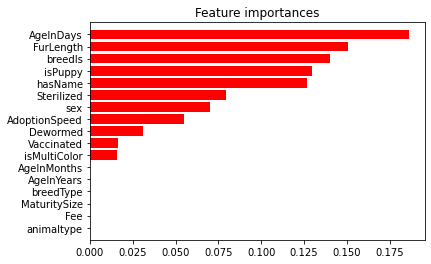

In [219]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

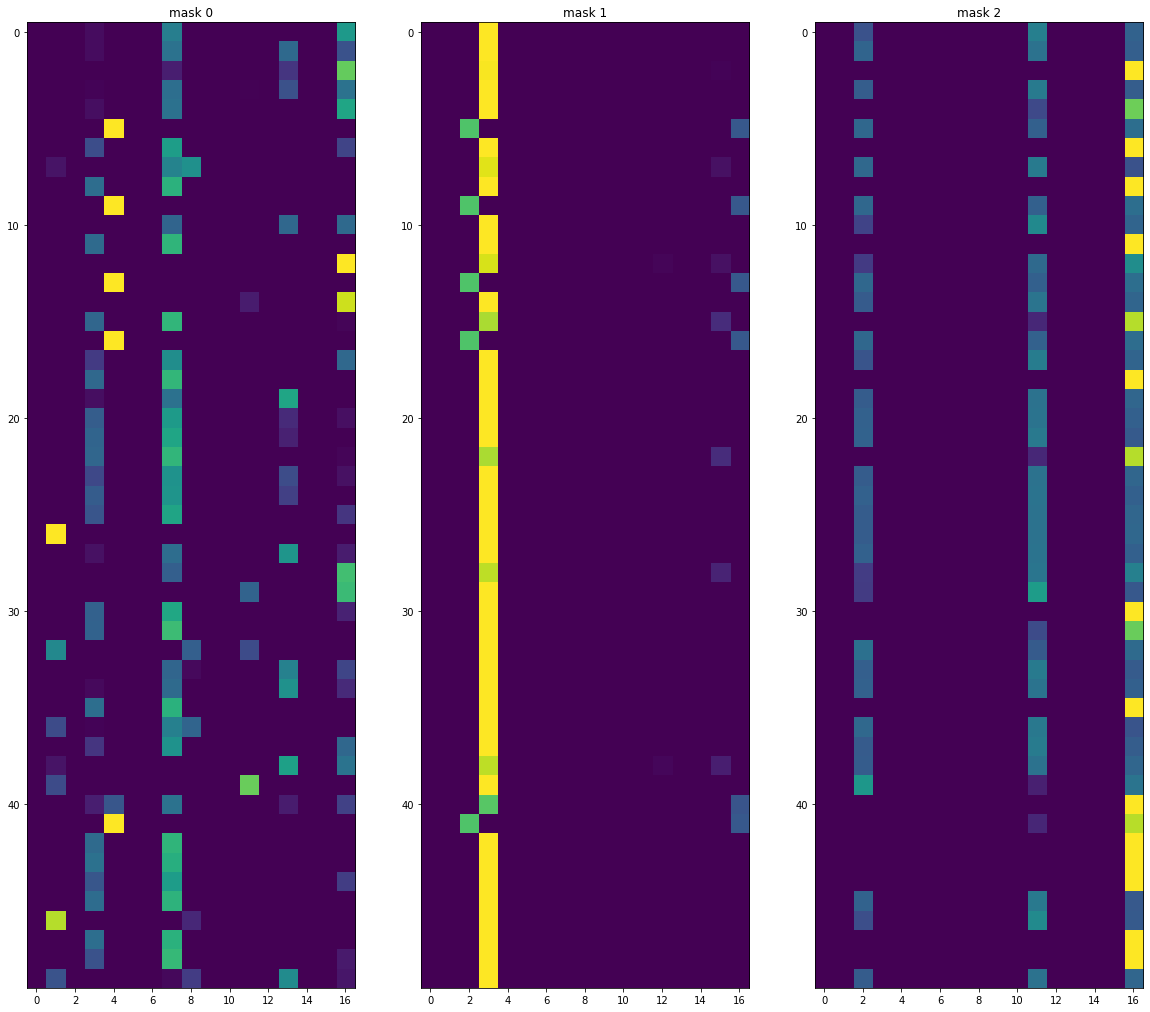

In [220]:
explain_matrix, masks = clf.explain(X_test)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet loss graph

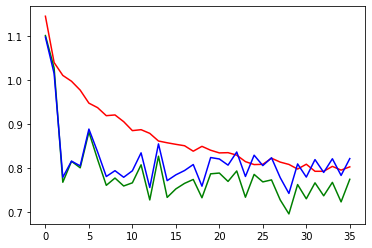

In [221]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

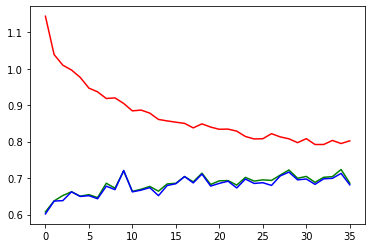

In [222]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


In [223]:
preds = clf.predict_proba(X_test)
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr') 

0.8717752614561395

In [224]:
roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest

0.8717752614561395

#### tabnet roc graph


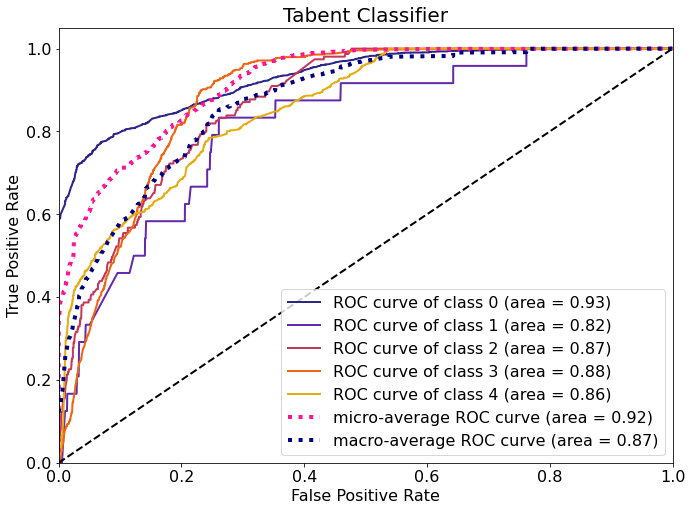

In [225]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [226]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

BEST VALID SCORE FOR Cat+Dog : 0.9088570478923996
FINAL TEST SCORE FOR Cat+Dog : 0.9053685561843321


#### tabnet F1 score

In [227]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, y_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, y_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

0.7166444210836789
0.68
0.45924968729265003


###Tabnet dog self_supervised learning


####Dog

In [228]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cuda


In [229]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)


unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

Device used : cuda
epoch 0  | loss: 5.18089 | val_0_unsup_loss: 1.47145 |  0:00:01s
epoch 1  | loss: 1.16496 | val_0_unsup_loss: 1.07619 |  0:00:02s
epoch 2  | loss: 1.00864 | val_0_unsup_loss: 0.97917 |  0:00:04s
epoch 3  | loss: 0.97166 | val_0_unsup_loss: 0.93142 |  0:00:05s
epoch 4  | loss: 0.93671 | val_0_unsup_loss: 0.87585 |  0:00:07s
epoch 5  | loss: 0.90131 | val_0_unsup_loss: 0.84238 |  0:00:08s
epoch 6  | loss: 0.87773 | val_0_unsup_loss: 0.8295  |  0:00:10s
epoch 7  | loss: 0.86513 | val_0_unsup_loss: 0.8203  |  0:00:11s
epoch 8  | loss: 0.8522  | val_0_unsup_loss: 0.80731 |  0:00:12s
epoch 9  | loss: 0.83823 | val_0_unsup_loss: 0.78887 |  0:00:14s
epoch 10 | loss: 0.82788 | val_0_unsup_loss: 0.76649 |  0:00:15s
epoch 11 | loss: 0.81817 | val_0_unsup_loss: 0.75156 |  0:00:17s
epoch 12 | loss: 0.80516 | val_0_unsup_loss: 0.74247 |  0:00:18s
epoch 13 | loss: 0.7919  | val_0_unsup_loss: 0.72702 |  0:00:20s
epoch 14 | loss: 0.78174 | val_0_unsup_loss: 0.70759 |  0:00:21s
epoch 

In [230]:
reconstructed_X, embedded_X = unsupervised_model.predict(X_valid_dogs)
assert(reconstructed_X.shape==embedded_X.shape)

In [231]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(X_valid_dogs)


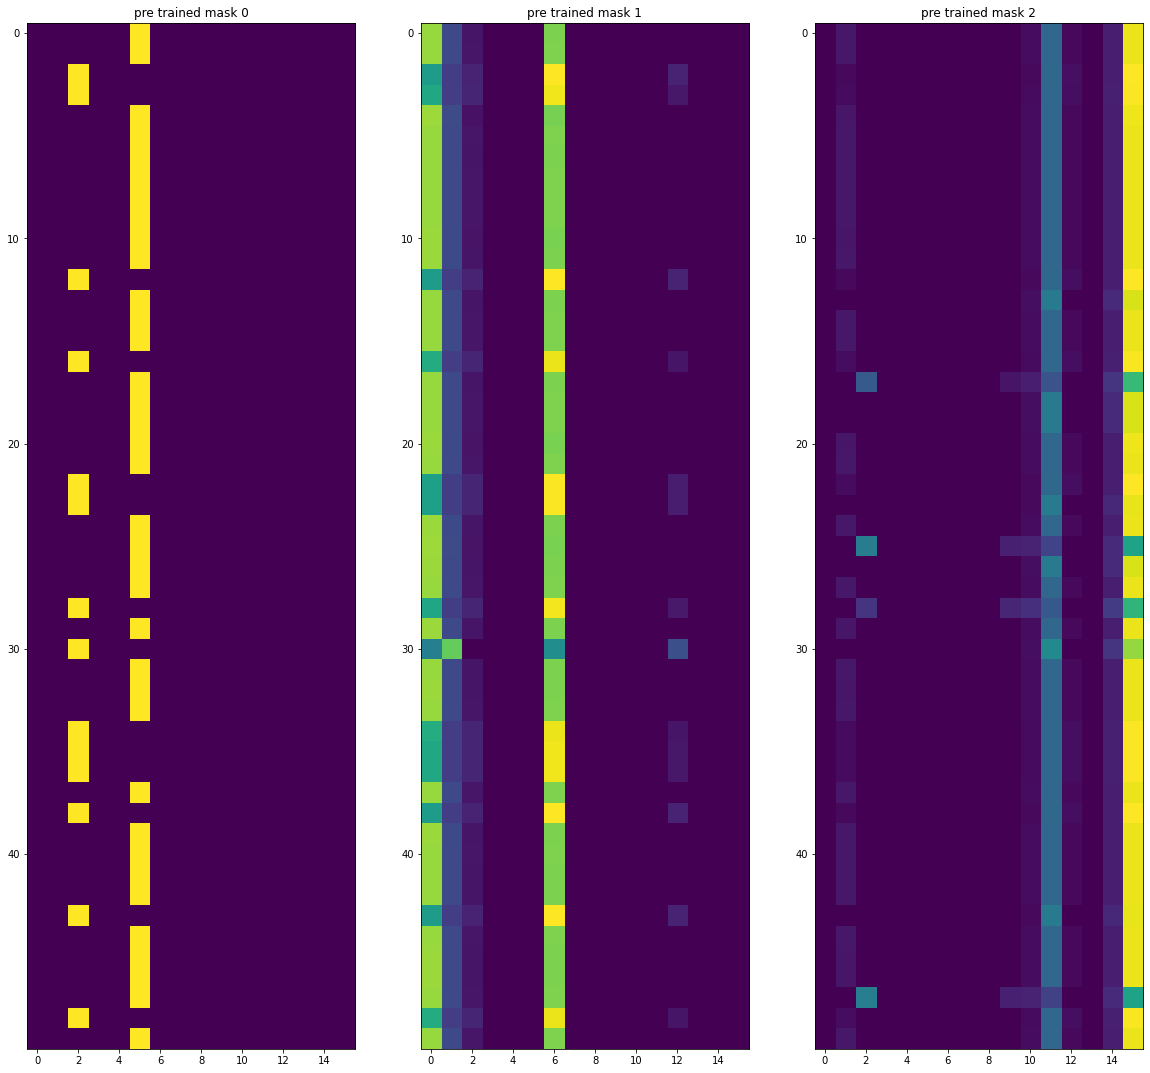

In [232]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"pre trained mask {i}")

In [233]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

Successfully saved model at ./test_pretrain.zip
Device used : cuda
Device used : cuda


In [234]:
from pytorch_tabnet.metrics import Metric

class F1Weighted(Metric):
    def __init__(self):
        self._name = "f1_weighted"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        return f1_score(y_true,  np.argmax(y_pred, axis = 1), average = 'weighted')

In [ ]:
max_epochs = 1000
clf.fit(
    X_train=X_train_dogs, y_train=y_train_dogs,
    eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
    eval_name=['train', 'valid'],
    eval_metric=['logloss','f1_weighted'],
    max_epochs=max_epochs , patience=20,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain    
) 

Loading weights from unsupervised pretraining


/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_dims changed from [] to [3, 2, 131, 2, 106, 21, 2, 2, 2, 4, 3, 3, 3, 61, 5, 38]
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_emb_dim changed from 1 to 3
  warnings.warn(wrn_msg)
/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:97: UserWarning: Pretraining: cat_idxs changed from [] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.50087 | train_logloss: 1.11578 | train_f1_weighted: 0.49681 | valid_logloss: 1.11271 | valid_f1_weighted: 0.49305 |  0:00:02s
epoch 1  | loss: 1.22945 | train_logloss: 1.1939  | train_f1_weighted: 0.51618 | valid_logloss: 1.20318 | valid_f1_weighted: 0.50983 |  0:00:04s
epoch 2  | loss: 1.14675 | train_logloss: 1.08107 | train_f1_weighted: 0.57197 | valid_logloss: 1.0796  | valid_f1_weighted: 0.58869 |  0:00:07s
epoch 3  | loss: 1.06799 | train_logloss: 1.06412 | train_f1_weighted: 0.59449 | valid_logloss: 1.05824 | valid_f1_weighted: 0.6129  |  0:00:09s
epoch 4  | loss: 1.02161 | train_logloss: 1.04828 | train_f1_weighted: 0.6002  | valid_logloss: 1.05323 | valid_f1_weighted: 0.61614 |  0:00:11s
epoch 5  | loss: 0.98304 | train_logloss: 0.94789 | train_f1_weighted: 0.61498 | valid_logloss: 0.95013 | valid_f1_weighted: 0.61233 |  0:00:14s
epoch 6  | loss: 0.95631 | train_logloss: 0.91231 | train_f1_weighted: 0.63654 | valid_logloss: 0.90668 | valid_f1_weighted: 0.641

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test_dogs)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"selp supervised mask {i}")

#### tabnet loss graph

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test_dogs, clf.predict_proba(X_test_dogs), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Dog'

preds = clf.predict_proba(X_test_dogs)
test_auc = round(roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr',average='weighted' ),3)
preds_valid = clf.predict_proba(X_valid_dogs)
valid_auc = round(roc_auc_score(y_score=preds_valid, y_true=y_valid_dogs,multi_class='ovr',average='weighted'),3)

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test_dogs)
print(round(f1_score(y_test_dogs, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(round(f1_score(y_test_dogs, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(round(f1_score(y_test_dogs, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음



### Dog's tabnet Tuning


In [ ]:
from sklearn.model_selection import KFold
import optuna
from optuna import Trial, visualization

In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=dogs_cat_idxs,
    cat_dims=dogs_cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax', # "sparsemax",
)


unsupervised_model.fit(
    X_train = X_train_dogs,
    eval_set=[X_valid_dogs],
    pretraining_ratio = 0.8,
    drop_last=True,
)

In [ ]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

In [ ]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X_train_dogs):
        # X_train1, X_valid1 = X_train[train_index], X_train[test_index]
        # y_train1, y_valid1 = X_train[train_index], X_train[test_index]
        classifier = TabNetClassifier(**tabnet_params)
        classifier.fit(X_train=X_train_dogs, y_train=y_train_dogs,
                  eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 1000),
                  eval_metric=['logloss','f1_weighted'],
                  from_unsupervised=loaded_pretrain,
                  )
        CV_score_array.append(classifier.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=15,n_trials=5) 

In [ ]:
TabNet_params = study.best_params

In [ ]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     from_unsupervised=loaded_pretrain,
                     )
epochs = TabNet_params['epochs']

In [ ]:
clf = TabNetClassifier(final_params)
clf.fit(X_train=X_train_dogs, y_train=y_train_dogs,
        eval_set=[(X_train_dogs, y_train_dogs), (X_valid_dogs, y_valid_dogs)],
        eval_name=['train', 'valid'],
        eval_metric=['logloss','f1_weighted'],
        max_epochs=epochs ,
        batch_size=512, virtual_batch_size=128,
        patience=TabNet_params['patience'], 
        num_workers=0,
        weights=1,
        drop_last=True,
        from_unsupervised=loaded_pretrain        
        )

#### TabNet_Feature Importance

In [ ]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### Tabnet_Explain Mask

In [ ]:
explain_matrix, masks = clf.explain(X_test_dogs)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

#### tabnet loss graph

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_logloss'],'g')
plt.plot(clf.history['valid_logloss'],'b')

In [ ]:
plt.plot(clf.history['loss'],'r')
# plot logloss
plt.plot(clf.history['train_f1_weighted'],'g')
plt.plot(clf.history['valid_f1_weighted'],'b')

#### tabnet roc score


In [ ]:
preds = clf.predict_proba(X_test_dogs)
roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr') 

In [ ]:
roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr')#불균형한 데이터에 적합한 one vs rest

#### tabnet roc graph


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

skplt.metrics.plot_roc(y_test_dogs, clf.predict_proba(X_test_dogs), title='Tabent Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)

####tabnet AuROC score

In [ ]:
dataset_name = 'Dog'

preds = clf.predict_proba(X_test_dogs)
test_auc = round(roc_auc_score(y_score=preds, y_true=y_test_dogs,multi_class='ovr',average='weighted' ),3)
preds_valid = clf.predict_proba(X_valid_dogs)
valid_auc = round(roc_auc_score(y_score=preds_valid, y_true=y_valid_dogs,multi_class='ovr',average='weighted'),3)

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### tabnet F1 score

In [ ]:
y_pred = clf.predict(X_test_dogs)
print(round(f1_score(y_test_dogs, y_pred, average='weighted'),3)) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(round(f1_score(y_test_dogs, y_pred, average='micro'),3)) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(round(f1_score(y_test_dogs, y_pred, average='macro'),3)) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### LogisticRegression classifier 

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_winner = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

#### LogisticRegression classifier f1 score

In [ ]:
print(f1_score(y_test, Y_pred_winner, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, Y_pred_winner, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, Y_pred_winner, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, y_train.ravel())  

Y_pred_KNN = knn.predict(X_test)


acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

##### KNN classifier f1 score

In [ ]:
print(f1_score(y_test, Y_pred_KNN, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, Y_pred_KNN, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, Y_pred_KNN, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, clf.predict(X_test)))

#### Decison tree classifier f1 score

In [ ]:
print(f1_score(y_test, pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려)
print(f1_score(y_test, pred, average='macro')) # 불균형을 고려하지 않음


```

0.6391194805271514
0.7101796407185629
0.3104011420874966
```



### Random Forest(Tuning Done)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())
rf_pred = rf.predict(X_test)

rf.score(X_train, y_train.ravel())
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
acc_random_forest

In [ ]:
# rfc = RandomForestClassifier(random_state=42)

# param_grid = {  #12개의 모델을 5번 훈련시켜서 교차 검증을 수행한다.
#     'n_estimators': [1000, 5000],
#     'max_depth' : [6, 10, 12],
#     'criterion' :['gini', 'entropy'],
#     'random_state' : [0, 1]
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train.ravel())


# CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 5000,
 'random_state': 0}

In [ ]:
rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=5000,
                             min_samples_split=20,
                             min_samples_leaf=1,
                             max_depth = 10,
                             max_features='auto',
                             oob_score=True,
                             random_state=0,
                             n_jobs=-1)

rf.fit(X_train, y_train)
# rf = rf.predict_proba(X_test)
rf_pred = rf.predict(X_test)

rf.score(X_train, y_train)
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
acc_random_forest

####Random Forest Feature Importance

In [ ]:
feat_importances = rf.feature_importances_
indices = np.argsort(feat_importances)
plt.figure(figsize=(10,20))
plt.title('Random Forest Feature Importances Cat&Dog')
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

####Random Forest AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = rf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = rf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### Random Forest f1 score

In [ ]:
print(f1_score(y_test, rf_pred, average='weighted')) # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음
print(f1_score(y_test, rf_pred, average='micro')) # 전체적인 정밀도와 재현율을 고려함(불균형 조금 고려) https://junklee.tistory.com/116)
print(f1_score(y_test, rf_pred, average='macro')) # 불균형을 고려하지 않음 # 불균형 클래스에도 가중치를 줌으로써 정밀하게 측정 할 수 있음

### XGBoost

ROC Curve

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

Without Grid Search and Parameters (Base)

In [ ]:
model = xgb.XGBClassifier(n_estimators=1000)
model.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test,y_test)],
    early_stopping_rounds=50
    )
xgboost_pred = model.predict_proba(X_test)
score = model.score(X_train, y_train)
score = round(score * 100, 2)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='Before tuning XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print(score)

Grid Search(진행중)


In [ ]:
# alg = xgb.XGBClassifier(objective='multi:softprob')
# params = param_grid = {
#     'n_estimators': [500, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [5,10,15],
#     'subsample': [0.7, 0.8, 0.9],
#     'learning_rate': [0.01, 0.02]
# }
# clf = GridSearchCV(alg, params, 
#                         verbose=1,
#                         scoring='neg_log_loss') #만약 NaN문제 발생시 error_score='raise' 추가

# clf.fit(X_train,y_train)
# pred = clf.predict_proba(X_test)
# print(clf.best_score_)
# print(clf.best_params_)


Best params : max_depth=5, n_estimators=1000, learning_rate=0.01,subsample=0.8, colsample_bytree=0.7

In [ ]:
model = xgb.XGBClassifier(max_depth=5, missing=np.nan, n_estimators=1000, learning_rate=0.01,  subsample=0.8, colsample_bytree=0.7, seed=1024,objective= 'multi:softprob')
    
model.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test, y_test)],
    early_stopping_rounds=50
    )

score = model.score(X_train, y_train)
print(score)

####XGBoost Feature Importance

In [ ]:
feat_importances = model.feature_importances_
indices = np.argsort(feat_importances)
plt.figure(figsize=(10,20))
plt.title('XGBoost Feature Importances Cat&Dog')
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

In [ ]:
dataset_name = 'Cat+Dog'

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr' )


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### XGBoost auc graph

In [ ]:
xgb_pred_with_grid = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='Tuned XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

####XGBoost AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = model.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted' )


preds_valid = model.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### XGBoost_F1 score

In [ ]:
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted')) 
print(f1_score(y_test, y_pred, average='micro')) 
print(f1_score(y_test, y_pred, average='macro')) 

### LightGBM

In [ ]:
# param = [{'n_estimators': [100, 500, 1000],
#          'learning_rate': [0.1, 0.05, 0.01]}]
# model = GridSearchCV(LGBMClassifier(), param, cv=5)
# name = 'LightGBM'
# model.fit(X_train, y_train)
# print(name,': ',model.best_params_)
# pred_y_cats = model.predict_proba(X_test)

# print('train score: {}'.format(model.score(X_train, y_train)))
# print('test score: {}'.format(model.score(X_test, y_test)))

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=1000,learning_rate = 0.01)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="multiclass", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

Best params : {'n_estimators': 1000,
               'learning_rate': 0.01}

####LGBM Feature Importance

In [ ]:
feat_importances = lgbm_wrapper.feature_importances_
indices = np.argsort(feat_importances)
plt.figure(figsize=(10,20))
plt.title('LGBM Feature Importances Cat&Dog')
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

#### LGBM auc graph

In [ ]:
skplt.metrics.plot_roc(y_test, lgbm_wrapper.predict_proba(X_test), title='LightGBM Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

####LGBM AuROC score

In [ ]:
dataset_name = 'Cat+Dog'

preds = lgbm_wrapper.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds, y_true=y_test,multi_class='ovr',average='weighted')


preds_valid = lgbm_wrapper.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid, y_true=y_valid,multi_class='ovr',average='weighted')

print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

#### LGBM f1 score

In [ ]:
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted')) 
print(f1_score(y_test, y_pred, average='micro')) 
print(f1_score(y_test, y_pred, average='macro')) 

### (보류)Gradient Boosting Classifier

In [ ]:
# import pandas as pd, sys, time
# def gridsearch_gbm(params_grid, X_train, y_train):
#     model_start = time.time()  
#     gbc = GradientBoostingClassifier()
#     best_model = GridSearchCV(gbc, param_grid=params_grid, n_jobs=-1)
#     model_end = time.time()

    
#     fit_start = time.time()
#     best_model.fit(X_train, y_train)
#     fit_end = time.time()
  
    
#     return best_model

# def gridsearch_stats(model, X_test, y_test):
#     print(model.best_params_)
    
#     probas = model.predict_proba(X_test)
#     print(log_loss(y_test, probas))
    
#     return probas

In [ ]:
# params = {
#             'max_depth': [10,15,20,25],
#             'min_samples_leaf': [100,500,1000], 
#             "learning_rate": [0.03, 0.05], 
#             "max_features": [10,15,20]
#             }

# gbm_gc = gridsearch_gbm(params, X_train, y_train)

In [ ]:
# gbm_gc.best_params_

In [ ]:
# gridsearch_stats(gbm_gc, X_test, y_test)

In [ ]:
# probas = gbm_gc.predict_proba(X_test)

RandomForestClassifier

In [ ]:
# from sklearn.model_selection import GridSearchCV, cross_val_score

# print(cross_val_score(RandomForestClassifier(n_estimators=500, 
#                                  n_jobs=-1, random_state=0, max_features= 15, 
#                             max_depth= 5), 
#                               X_train, y_train, cv=5))
# print('')
# print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=1000, 
#                                  n_jobs=-1, random_state=1, max_features=60, 
#                             max_depth= 5), 
#                               X_train, y_train, cv=5)),4)))